# Summary

## My Final Scores - 
#### 1. XGBoost -> 96.17834
#### 2. Neural Network -> 93.69807
#### 3. CatBoost -> 88.48

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
# mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
pylab.rcParams[ 'figure.figsize' ] = 8,6

# Catboost
from catboost import CatBoostRegressor
import catboost

# Xgboost
import xgboost

# Grid Search
from sklearn.model_selection import GridSearchCV

# NN
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


## Getting The Data
<br>

- Training Data (shape = 2000,5)
 - Temperature
 - Volume
 - Pressure
 - Relative Humidity
 - Energy
 
 <br>
 
- Testing Data (shape = 200,4)
 - Temperature
 - Volume
 - Pressure
 - Relative Humidity
 - Energy 
 

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
## Taking log of E
train_data['E'] = train_data['E'].apply(lambda x: np.log(x))

In [4]:
train_data.shape

(2000, 5)

In [5]:
train_data.head()

,T,V,P,RH,E
0,273.39,420.12,91.84,57.41,7.483312
1,195.26,248.88,92.29,35.21,7.508875
2,377.52,360.42,92.31,27.69,7.474046
3,171.60,244.98,91.61,56.99,7.544142
4,222.56,353.70,92.43,54.25,7.499246


In [6]:
test_data.shape

(200, 4)

In [7]:
test_data.head()

,T,V,P,RH
0,236.34,406.26,91.32,52.36
1,237.51,308.58,91.85,53.03
2,123.89,264.18,91.72,53.99
3,142.35,262.80,92.96,38.08
4,263.90,350.46,92.19,51.83


## Checking the dataframe values if null

In [8]:
train_data.isnull().sum()

T     0
V     0
P     0
RH    0
E     0
dtype: int64

In [9]:
test_data.isnull().sum()

T     0
V     0
P     0
RH    0
dtype: int64

# Visualization

## 1. Making of Pair Plot

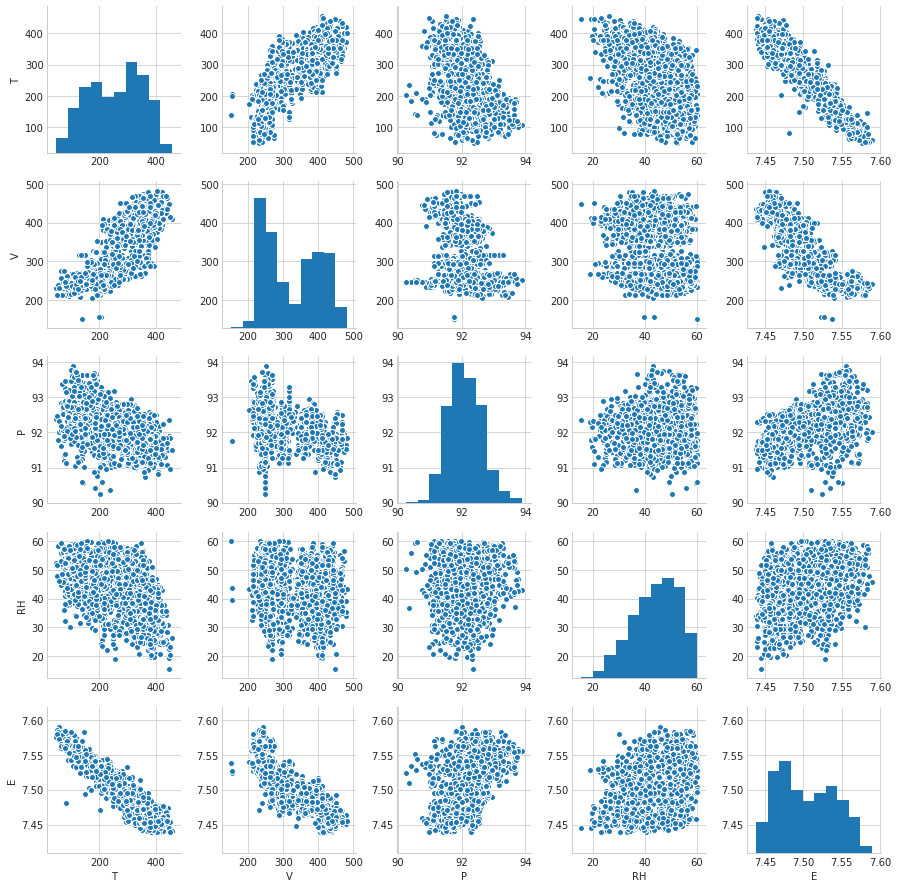

In [10]:
sns.pairplot(train_data)

## 2. JointPlots
#### X vs Y
- RH vs P
- P vs E
- T vs E
- V vs E

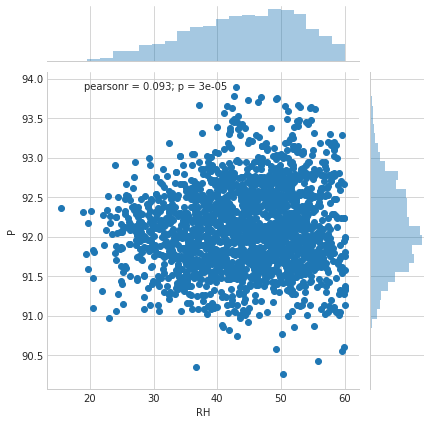

In [11]:
sns.jointplot(x = "RH", y = "P", data = train_data)

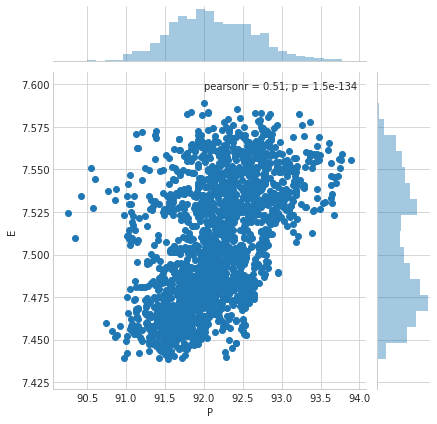

In [12]:
sns.jointplot(x = "P", y = "E", data = train_data)

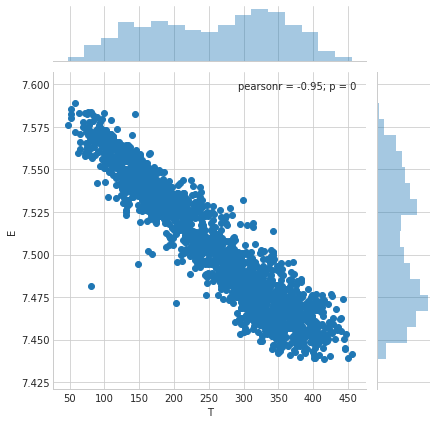

In [13]:
sns.jointplot(x = "T", y = "E", data = train_data)

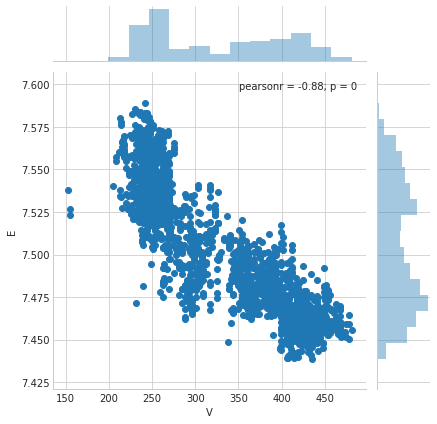

In [14]:
sns.jointplot(x = "V", y = "E", data = train_data)

## Making of Scatter Plots To see Outliers if any
- T
- P
- V
- RH

In [15]:
def plot_feature(df, col):
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

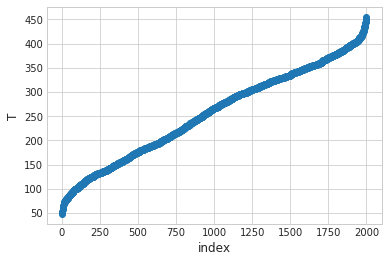

In [16]:
plot_feature(train_data,'T')

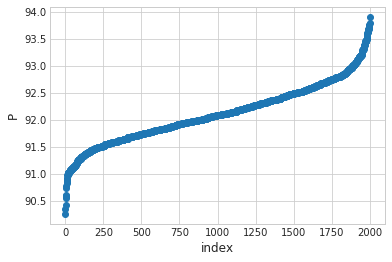

In [17]:
plot_feature(train_data,'P')

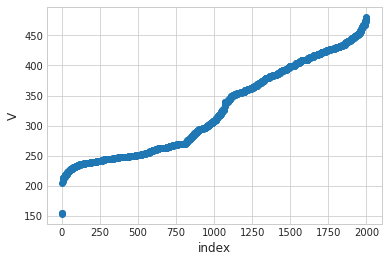

In [18]:
plot_feature(train_data,'V')

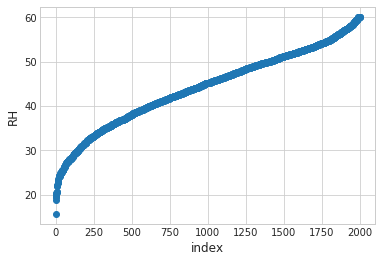

In [19]:
plot_feature(train_data,'RH')

# Models
## 1. CatBoost ( Score - 88.48)

In [20]:
test_data.head(1)

,T,V,P,RH
0,236.34,406.26,91.32,52.36


In [29]:
X = train_data.drop(['E'] , axis =1)
y = np.exp(train_data.E)

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size=0.8,random_state=0)

In [31]:
model=catboost.CatBoostRegressor(iterations=10000, depth=7, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

0:	learn: 1643.3640349	test: 1635.6771309	best: 1635.6771309 (0)	total: 5.51ms	remaining: 55.1s
1:	learn: 1484.3332826	test: 1477.2370609	best: 1477.2370609 (1)	total: 11.2ms	remaining: 56s
2:	learn: 1341.0368775	test: 1334.1688517	best: 1334.1688517 (2)	total: 16.9ms	remaining: 56.4s
3:	learn: 1212.4623618	test: 1206.8560432	best: 1206.8560432 (3)	total: 23.3ms	remaining: 58.1s
4:	learn: 1095.7908833	test: 1091.3411844	best: 1091.3411844 (4)	total: 28.8ms	remaining: 57.5s
5:	learn: 991.7382613	test: 988.3723420	best: 988.3723420 (5)	total: 34.7ms	remaining: 57.8s
6:	learn: 896.9153229	test: 894.3687377	best: 894.3687377 (6)	total: 40.7ms	remaining: 58.1s
7:	learn: 811.2011828	test: 808.8578222	best: 808.8578222 (7)	total: 46.4ms	remaining: 57.9s
8:	learn: 732.9417626	test: 731.9774710	best: 731.9774710 (8)	total: 51.5ms	remaining: 57.2s
9:	learn: 661.6063528	test: 660.8821022	best: 660.8821022 (9)	total: 56.6ms	remaining: 56.6s
10:	learn: 598.9172164	test: 598.6200857	best: 598.620085

162:	learn: 26.4464331	test: 35.5229379	best: 35.5229379 (162)	total: 599ms	remaining: 36.1s
163:	learn: 26.4168651	test: 35.4710613	best: 35.4710613 (163)	total: 605ms	remaining: 36.3s
164:	learn: 26.4168620	test: 35.4708280	best: 35.4708280 (164)	total: 607ms	remaining: 36.2s
165:	learn: 26.3016955	test: 35.2483341	best: 35.2483341 (165)	total: 612ms	remaining: 36.2s
166:	learn: 26.3016899	test: 35.2479491	best: 35.2479491 (166)	total: 613ms	remaining: 36.1s
167:	learn: 26.3016846	test: 35.2476173	best: 35.2476173 (167)	total: 615ms	remaining: 36s
168:	learn: 26.3016803	test: 35.2473193	best: 35.2473193 (168)	total: 617ms	remaining: 35.9s
169:	learn: 26.3016773	test: 35.2470397	best: 35.2470397 (169)	total: 619ms	remaining: 35.8s
170:	learn: 26.3016748	test: 35.2467882	best: 35.2467882 (170)	total: 621ms	remaining: 35.7s
171:	learn: 26.3016729	test: 35.2465620	best: 35.2465620 (171)	total: 623ms	remaining: 35.6s
172:	learn: 26.3016713	test: 35.2463585	best: 35.2463585 (172)	total: 62

253:	learn: 25.8896461	test: 34.6836286	best: 34.6836286 (253)	total: 786ms	remaining: 30.2s
254:	learn: 25.8896453	test: 34.6835632	best: 34.6835632 (254)	total: 787ms	remaining: 30.1s
255:	learn: 25.8896446	test: 34.6835041	best: 34.6835041 (255)	total: 788ms	remaining: 30s
256:	learn: 25.8896440	test: 34.6834508	best: 34.6834508 (256)	total: 789ms	remaining: 29.9s
257:	learn: 25.8896435	test: 34.6834025	best: 34.6834025 (257)	total: 791ms	remaining: 29.9s
258:	learn: 25.8896431	test: 34.6833589	best: 34.6833589 (258)	total: 792ms	remaining: 29.8s
259:	learn: 25.8896427	test: 34.6833195	best: 34.6833195 (259)	total: 794ms	remaining: 29.7s
260:	learn: 25.8896424	test: 34.6832838	best: 34.6832838 (260)	total: 796ms	remaining: 29.7s
261:	learn: 25.8896422	test: 34.6832516	best: 34.6832516 (261)	total: 798ms	remaining: 29.7s
262:	learn: 25.8896420	test: 34.6832225	best: 34.6832225 (262)	total: 800ms	remaining: 29.6s
263:	learn: 25.8896418	test: 34.6831962	best: 34.6831962 (263)	total: 80

CatboostIpythonWidget(data={'.': {'content': {'rows': {'learn_error': [['iter', 'RMSE'], ['0', '1643.364035'], ['1', '1484.333283'], ['2', '1341.036878'], ['3', '1212.462362'], ['4', '1095.790883'], ['5', '991.7382613'], ['6', '896.9153229'], ['7', '811.2011828'], ['8', '732.9417626'], ['9', '661.6063528'], ['10', '598.9172164'], ['11', '540.9214074'], ['12', '488.4270365'], ['13', '441.5087696'], ['14', '399.335442'], ['15', '361.267613'], ['16', '327.0515025'], ['17', '295.7201494'], ['18', '268.0788362'], ['19', '242.8816175'], ['20', '220.00813'], ['21', '199.1933223'], ['22', '180.5935929'], ['23', '163.8538943'], ['24', '148.5227071'], ['25', '134.8137592'], ['26', '122.7887619'], ['27', '111.8823363'], ['28', '102.05266'], ['29', '93.14034799'], ['30', '85.30554073'], ['31', '78.27694822'], ['32', '72.0659211'], ['33', '66.54454707'], ['34', '61.68641032'], ['35', '57.31770793'], ['36', '53.47442876'], ['37', '50.08924079'], ['38', '47.14660218'], ['39', '44.56914172'], ['40', '42.3244383'], ['41', '40.36965173'], ['42', '38.72189474'], ['43', '37.24617166'], ['44', '36.0527173'], ['45', '34.92305217'], ['46', '33.99890608'], ['47', '33.19286567'], ['48', '32.51032559'], ['49', '31.8630867'], ['50', '31.28345781'], ['51', '30.91114396'], ['52', '30.42684511'], ['53', '30.16000621'], ['54', '29.8691498'], ['55', '29.62087617'], ['56', '29.4123363'], ['57', '29.11048382'], ['58', '28.96623049'], ['59', '28.84196752'], ['60', '28.62730706'], ['61', '28.52311021'], ['62', '28.43462422'], ['63', '28.2364538'], ['64', '28.07241789'], ['65', '27.96266574'], ['66', '27.84486619'], ['67', '27.7944462'], ['68', '27.62981971'], ['69', '27.53875943'], ['70', '27.4788023'], ['71', '27.46493468'], ['72', '27.45351291'], ['73', '27.44774307'], ['74', '27.42592281'], ['75', '27.41568341'], ['76', '27.36539679'], ['77', '27.33113782'], ['78', '27.31001589'], ['79', '27.2760371'], ['80', '27.2746963'], ['81', '27.17652234'], ['82', '27.17029627'], ['83', '27.1695543'], ['84', '27.16409249'], ['85', '27.16245481'], ['86', '27.1611876'], ['87', '27.16016792'], ['88', '27.15898385'], ['89', '27.15847049'], ['90', '27.15817249'], ['91', '27.15792535'], ['92', '27.15780946'], ['93', '27.15765093'], ['94', '27.1570374'], ['95', '27.15694267'], ['96', '27.15687547'], ['97', '27.15622949'], ['98', '27.15612811'], ['99', '27.15561988'], ['100', '27.15549941'], ['101', '27.15543352'], ['102', '27.15536919'], ['103', '27.15531554'], ['104', '27.15522146'], ['105', '27.15514198'], ['106', '27.15510039'], ['107', '27.15503443'], ['108', '27.15500059'], ['109', '27.10572127'], ['110', '27.10569302'], ['111', '27.10566935'], ['112', '27.10560622'], ['113', '27.10558677'], ['114', '27.10553369'], ['115', '27.10548877'], ['116', '27.10547294'], ['117', '27.00451087'], ['118', '27.00446087'], ['119', '27.00441899'], ['120', '26.92484682'], ['121', '26.92478883'], ['122', '26.92474017'], ['123', '26.924708'], ['124', '26.92468083'], ['125', '26.92464122'], ['126', '26.92460793'], ['127', '26.9245858'], ['128', '26.92455812'], ['129', '26.8528617'], ['130', '26.8528126'], ['131', '26.85279014'], ['132', '26.8527712'], ['133', '26.83858487'], ['134', '26.68845962'], ['135', '26.68845143'], ['136', '26.68839294'], ['137', '26.6883439'], ['138', '26.68830279'], ['139', '26.68829912'], ['140', '26.68826527'], ['141', '26.68823687'], ['142', '26.68821301'], ['143', '26.68821127'], ['144', '26.68819151'], ['145', '26.68817489'], ['146', '26.563736'], ['147', '26.56370933'], ['148', '26.563706'], ['149', '26.56368421'], ['150', '26.56366594'], ['151', '26.56366401'], ['152', '26.56364897'], ['153', '26.56364762'], ['154', '26.56364651'], ['155', '26.56363421'], ['156', '26.56362388'], ['157', '26.56361518'], ['158', '26.56361456'], ['159', '26.56360731'], ['160', '26.56360121'], ['161', '26.56360079'], ['162', '26.44643306'], ['163', '26.41686513'], ['164', '26.416862'], ['165', '26.30169546'], ['166', '26.30168986'], ['167', '26.30168457'], ['168', '26.30168026']

299:	learn: 25.7187991	test: 34.3562889	best: 34.3562889 (299)	total: 907ms	remaining: 29.3s
300:	learn: 25.7187988	test: 34.3562419	best: 34.3562419 (300)	total: 908ms	remaining: 29.3s
301:	learn: 25.7187985	test: 34.3561995	best: 34.3561995 (301)	total: 909ms	remaining: 29.2s
302:	learn: 25.7187983	test: 34.3561612	best: 34.3561612 (302)	total: 910ms	remaining: 29.1s
303:	learn: 25.7187981	test: 34.3561266	best: 34.3561266 (303)	total: 912ms	remaining: 29.1s
304:	learn: 25.7187979	test: 34.3560953	best: 34.3560953 (304)	total: 915ms	remaining: 29.1s
305:	learn: 25.7187978	test: 34.3560670	best: 34.3560670 (305)	total: 956ms	remaining: 30.3s
306:	learn: 25.7187976	test: 34.3560414	best: 34.3560414 (306)	total: 957ms	remaining: 30.2s
307:	learn: 25.7187975	test: 34.3560183	best: 34.3560183 (307)	total: 958ms	remaining: 30.2s
308:	learn: 25.7187975	test: 34.3559974	best: 34.3559974 (308)	total: 961ms	remaining: 30.1s
309:	learn: 25.7187974	test: 34.3559785	best: 34.3559785 (309)	total: 

408:	learn: 25.4611706	test: 34.0191994	best: 34.0191994 (408)	total: 1.15s	remaining: 27s
409:	learn: 25.4611706	test: 34.0191934	best: 34.0191934 (409)	total: 1.15s	remaining: 27s
410:	learn: 25.4611706	test: 34.0191880	best: 34.0191880 (410)	total: 1.16s	remaining: 27s
411:	learn: 25.4611706	test: 34.0191832	best: 34.0191832 (411)	total: 1.16s	remaining: 26.9s
412:	learn: 25.4611706	test: 34.0191789	best: 34.0191789 (412)	total: 1.16s	remaining: 26.9s
413:	learn: 25.4611706	test: 34.0191750	best: 34.0191750 (413)	total: 1.16s	remaining: 26.9s
414:	learn: 25.4611706	test: 34.0191716	best: 34.0191716 (414)	total: 1.16s	remaining: 26.9s
415:	learn: 25.4611706	test: 34.0191684	best: 34.0191684 (415)	total: 1.16s	remaining: 26.8s
416:	learn: 25.4611706	test: 34.0191656	best: 34.0191656 (416)	total: 1.17s	remaining: 26.8s
417:	learn: 25.4459653	test: 34.0042633	best: 34.0042633 (417)	total: 1.17s	remaining: 26.8s
418:	learn: 25.4459652	test: 34.0042272	best: 34.0042272 (418)	total: 1.17s	

514:	learn: 25.2898289	test: 33.8291057	best: 33.8291056 (511)	total: 1.34s	remaining: 24.7s
515:	learn: 25.2898289	test: 33.8291057	best: 33.8291056 (511)	total: 1.35s	remaining: 24.7s
516:	learn: 25.1717504	test: 33.6986329	best: 33.6986329 (516)	total: 1.35s	remaining: 24.8s
517:	learn: 25.1717469	test: 33.6983356	best: 33.6983356 (517)	total: 1.35s	remaining: 24.8s
518:	learn: 25.1717441	test: 33.6980679	best: 33.6980679 (518)	total: 1.36s	remaining: 24.8s
519:	learn: 25.1717418	test: 33.6978270	best: 33.6978270 (519)	total: 1.36s	remaining: 24.8s
520:	learn: 25.1516371	test: 33.6776151	best: 33.6776151 (520)	total: 1.36s	remaining: 24.8s
521:	learn: 25.1516334	test: 33.6774254	best: 33.6774254 (521)	total: 1.37s	remaining: 24.8s
522:	learn: 25.1516304	test: 33.6772543	best: 33.6772543 (522)	total: 1.37s	remaining: 24.8s
523:	learn: 25.1516278	test: 33.6770999	best: 33.6770999 (523)	total: 1.37s	remaining: 24.8s
524:	learn: 25.1516256	test: 33.6769607	best: 33.6769607 (524)	total: 

603:	learn: 24.8770439	test: 33.3787397	best: 33.3787397 (603)	total: 1.53s	remaining: 23.8s
604:	learn: 24.8770438	test: 33.3786955	best: 33.3786955 (604)	total: 1.53s	remaining: 23.8s
605:	learn: 24.8770437	test: 33.3786556	best: 33.3786556 (605)	total: 1.53s	remaining: 23.7s
606:	learn: 24.8770437	test: 33.3786198	best: 33.3786198 (606)	total: 1.53s	remaining: 23.7s
607:	learn: 24.8770436	test: 33.3785876	best: 33.3785876 (607)	total: 1.53s	remaining: 23.7s
608:	learn: 24.8770436	test: 33.3785586	best: 33.3785586 (608)	total: 1.54s	remaining: 23.7s
609:	learn: 24.8770436	test: 33.3785325	best: 33.3785325 (609)	total: 1.54s	remaining: 23.7s
610:	learn: 24.8770435	test: 33.3785091	best: 33.3785091 (610)	total: 1.54s	remaining: 23.7s
611:	learn: 24.8770435	test: 33.3784880	best: 33.3784880 (611)	total: 1.54s	remaining: 23.6s
612:	learn: 24.8770435	test: 33.3784690	best: 33.3784690 (612)	total: 1.54s	remaining: 23.6s
613:	learn: 24.8770435	test: 33.3784520	best: 33.3784520 (613)	total: 

704:	learn: 24.6945747	test: 33.1300269	best: 33.1300269 (704)	total: 1.72s	remaining: 22.6s
705:	learn: 24.6945746	test: 33.1300196	best: 33.1300196 (705)	total: 1.72s	remaining: 22.6s
706:	learn: 24.6945746	test: 33.1300130	best: 33.1300130 (706)	total: 1.72s	remaining: 22.6s
707:	learn: 24.6945745	test: 33.1300073	best: 33.1300073 (707)	total: 1.73s	remaining: 22.6s
708:	learn: 24.6945745	test: 33.1300021	best: 33.1300021 (708)	total: 1.73s	remaining: 22.6s
709:	learn: 24.6945744	test: 33.1299976	best: 33.1299976 (709)	total: 1.73s	remaining: 22.6s
710:	learn: 24.6945744	test: 33.1299936	best: 33.1299936 (710)	total: 1.73s	remaining: 22.6s
711:	learn: 24.6945744	test: 33.1299901	best: 33.1299901 (711)	total: 1.73s	remaining: 22.6s
712:	learn: 24.6945744	test: 33.1299869	best: 33.1299869 (712)	total: 1.73s	remaining: 22.6s
713:	learn: 24.6945743	test: 33.1299842	best: 33.1299842 (713)	total: 1.74s	remaining: 22.6s
714:	learn: 24.6945743	test: 33.1299817	best: 33.1299817 (714)	total: 

843:	learn: 24.2958330	test: 32.6398570	best: 32.6398570 (843)	total: 2.04s	remaining: 22.2s
844:	learn: 24.2958329	test: 32.6398184	best: 32.6398184 (844)	total: 2.04s	remaining: 22.1s
845:	learn: 24.2950753	test: 32.6375197	best: 32.6375197 (845)	total: 2.05s	remaining: 22.1s
846:	learn: 24.2141742	test: 32.5238100	best: 32.5238100 (846)	total: 2.06s	remaining: 22.2s
847:	learn: 24.2141725	test: 32.5235885	best: 32.5235885 (847)	total: 2.06s	remaining: 22.2s
848:	learn: 24.1894911	test: 32.5000890	best: 32.5000890 (848)	total: 2.06s	remaining: 22.3s
849:	learn: 24.1894898	test: 32.4999117	best: 32.4999117 (849)	total: 2.07s	remaining: 22.2s
850:	learn: 24.1894887	test: 32.4997523	best: 32.4997523 (850)	total: 2.07s	remaining: 22.2s
851:	learn: 24.1528310	test: 32.4244752	best: 32.4244752 (851)	total: 2.07s	remaining: 22.3s
852:	learn: 24.1528302	test: 32.4243201	best: 32.4243201 (852)	total: 2.08s	remaining: 22.3s
853:	learn: 24.1528295	test: 32.4241805	best: 32.4241805 (853)	total: 

938:	learn: 24.0000564	test: 32.1676131	best: 32.1676131 (938)	total: 2.29s	remaining: 22.1s
939:	learn: 24.0000555	test: 32.1676026	best: 32.1676026 (939)	total: 2.29s	remaining: 22.1s
940:	learn: 24.0000547	test: 32.1675937	best: 32.1675937 (940)	total: 2.29s	remaining: 22.1s
941:	learn: 24.0000540	test: 32.1675860	best: 32.1675860 (941)	total: 2.29s	remaining: 22s
942:	learn: 24.0000534	test: 32.1675795	best: 32.1675795 (942)	total: 2.29s	remaining: 22s
943:	learn: 24.0000530	test: 32.1675740	best: 32.1675740 (943)	total: 2.3s	remaining: 22s
944:	learn: 24.0000526	test: 32.1675693	best: 32.1675693 (944)	total: 2.3s	remaining: 22s
945:	learn: 24.0000522	test: 32.1675653	best: 32.1675653 (945)	total: 2.3s	remaining: 22s
946:	learn: 24.0000519	test: 32.1675620	best: 32.1675620 (946)	total: 2.3s	remaining: 22s
947:	learn: 24.0000517	test: 32.1675593	best: 32.1675593 (947)	total: 2.3s	remaining: 22s
948:	learn: 23.9774933	test: 32.1302771	best: 32.1302771 (948)	total: 2.31s	remaining: 22

1043:	learn: 23.9165942	test: 32.0036321	best: 32.0036321 (1043)	total: 2.48s	remaining: 21.3s
1044:	learn: 23.9165938	test: 32.0035243	best: 32.0035243 (1044)	total: 2.48s	remaining: 21.2s
1045:	learn: 23.9165934	test: 32.0034273	best: 32.0034273 (1045)	total: 2.48s	remaining: 21.2s
1046:	learn: 23.9165932	test: 32.0033400	best: 32.0033400 (1046)	total: 2.48s	remaining: 21.2s
1047:	learn: 23.9165929	test: 32.0032615	best: 32.0032615 (1047)	total: 2.48s	remaining: 21.2s
1048:	learn: 23.9165928	test: 32.0031908	best: 32.0031908 (1048)	total: 2.48s	remaining: 21.2s
1049:	learn: 23.9165926	test: 32.0031271	best: 32.0031271 (1049)	total: 2.48s	remaining: 21.2s
1050:	learn: 23.9165925	test: 32.0030699	best: 32.0030699 (1050)	total: 2.49s	remaining: 21.2s
1051:	learn: 23.9165924	test: 32.0030183	best: 32.0030183 (1051)	total: 2.49s	remaining: 21.2s
1052:	learn: 23.9165923	test: 32.0029719	best: 32.0029719 (1052)	total: 2.49s	remaining: 21.2s
1053:	learn: 23.9165923	test: 32.0029302	best: 32.

1144:	learn: 23.7762845	test: 31.8058919	best: 31.8058919 (1144)	total: 2.67s	remaining: 20.6s
1145:	learn: 23.7762844	test: 31.8058606	best: 31.8058606 (1145)	total: 2.67s	remaining: 20.6s
1146:	learn: 23.7762843	test: 31.8058323	best: 31.8058323 (1146)	total: 2.67s	remaining: 20.6s
1147:	learn: 23.7762842	test: 31.8058067	best: 31.8058067 (1147)	total: 2.67s	remaining: 20.6s
1148:	learn: 23.7762841	test: 31.8057835	best: 31.8057835 (1148)	total: 2.67s	remaining: 20.6s
1149:	learn: 23.7762841	test: 31.8057626	best: 31.8057626 (1149)	total: 2.68s	remaining: 20.6s
1150:	learn: 23.7762840	test: 31.8057436	best: 31.8057436 (1150)	total: 2.68s	remaining: 20.6s
1151:	learn: 23.7762840	test: 31.8057265	best: 31.8057265 (1151)	total: 2.68s	remaining: 20.6s
1152:	learn: 23.7762840	test: 31.8057110	best: 31.8057110 (1152)	total: 2.68s	remaining: 20.6s
1153:	learn: 23.7762839	test: 31.8056970	best: 31.8056970 (1153)	total: 2.68s	remaining: 20.6s
1154:	learn: 23.7762839	test: 31.8056843	best: 31.

1240:	learn: 23.6264286	test: 31.5878991	best: 31.5878991 (1240)	total: 3s	remaining: 21.1s
1241:	learn: 23.6264283	test: 31.5878697	best: 31.5878697 (1241)	total: 3s	remaining: 21.2s
1242:	learn: 23.6264281	test: 31.5878430	best: 31.5878430 (1242)	total: 3s	remaining: 21.1s
1243:	learn: 23.6264279	test: 31.5878188	best: 31.5878188 (1243)	total: 3s	remaining: 21.1s
1244:	learn: 23.6264278	test: 31.5877968	best: 31.5877968 (1244)	total: 3s	remaining: 21.1s
1245:	learn: 23.6264277	test: 31.5877768	best: 31.5877768 (1245)	total: 3s	remaining: 21.1s
1246:	learn: 23.6264276	test: 31.5877587	best: 31.5877587 (1246)	total: 3.01s	remaining: 21.1s
1247:	learn: 23.6264275	test: 31.5877422	best: 31.5877422 (1247)	total: 3.01s	remaining: 21.1s
1248:	learn: 23.6264274	test: 31.5877273	best: 31.5877273 (1248)	total: 3.01s	remaining: 21.1s
1249:	learn: 23.6264274	test: 31.5877137	best: 31.5877137 (1249)	total: 3.01s	remaining: 21.1s
1250:	learn: 23.6128303	test: 31.5709028	best: 31.5709028 (1250)	tot

1346:	learn: 23.4938780	test: 31.4605362	best: 31.4605362 (1346)	total: 3.18s	remaining: 20.5s
1347:	learn: 23.4938780	test: 31.4605331	best: 31.4605331 (1347)	total: 3.19s	remaining: 20.4s
1348:	learn: 23.4938780	test: 31.4605303	best: 31.4605303 (1348)	total: 3.19s	remaining: 20.4s
1349:	learn: 23.4930272	test: 31.4583534	best: 31.4583534 (1349)	total: 3.19s	remaining: 20.5s
1350:	learn: 23.4773248	test: 31.4598847	best: 31.4583534 (1349)	total: 3.2s	remaining: 20.5s
1351:	learn: 23.4773248	test: 31.4598753	best: 31.4583534 (1349)	total: 3.2s	remaining: 20.5s
1352:	learn: 23.4767231	test: 31.4505253	best: 31.4505253 (1352)	total: 3.2s	remaining: 20.5s
1353:	learn: 23.4767231	test: 31.4505153	best: 31.4505153 (1353)	total: 3.2s	remaining: 20.5s
1354:	learn: 23.4767230	test: 31.4505063	best: 31.4505063 (1354)	total: 3.21s	remaining: 20.4s
1355:	learn: 23.4767230	test: 31.4504983	best: 31.4504983 (1355)	total: 3.21s	remaining: 20.4s
1356:	learn: 23.4767230	test: 31.4504912	best: 31.4504

1447:	learn: 23.3711399	test: 31.3650593	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1448:	learn: 23.3711399	test: 31.3650771	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1449:	learn: 23.3711399	test: 31.3650931	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1450:	learn: 23.3711398	test: 31.3651075	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1451:	learn: 23.3711398	test: 31.3651205	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1452:	learn: 23.3711398	test: 31.3651322	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1453:	learn: 23.3711398	test: 31.3651427	best: 31.3650178 (1445)	total: 3.38s	remaining: 19.9s
1454:	learn: 23.3711398	test: 31.3651522	best: 31.3650178 (1445)	total: 3.39s	remaining: 19.9s
1455:	learn: 23.3711398	test: 31.3651608	best: 31.3650178 (1445)	total: 3.39s	remaining: 19.9s
1456:	learn: 23.3711398	test: 31.3651685	best: 31.3650178 (1445)	total: 3.39s	remaining: 19.9s
1457:	learn: 23.3711398	test: 31.3651755	best: 31.

1543:	learn: 23.2106390	test: 31.2261860	best: 31.2261860 (1543)	total: 3.56s	remaining: 19.5s
1544:	learn: 23.2106390	test: 31.2261708	best: 31.2261708 (1544)	total: 3.57s	remaining: 19.5s
1545:	learn: 23.2106390	test: 31.2261570	best: 31.2261570 (1545)	total: 3.57s	remaining: 19.5s
1546:	learn: 23.2106390	test: 31.2261446	best: 31.2261446 (1546)	total: 3.57s	remaining: 19.5s
1547:	learn: 23.2106390	test: 31.2261334	best: 31.2261334 (1547)	total: 3.57s	remaining: 19.5s
1548:	learn: 23.2106390	test: 31.2261233	best: 31.2261233 (1548)	total: 3.58s	remaining: 19.5s
1549:	learn: 23.2106390	test: 31.2261142	best: 31.2261142 (1549)	total: 3.58s	remaining: 19.5s
1550:	learn: 23.2106390	test: 31.2261059	best: 31.2261059 (1550)	total: 3.58s	remaining: 19.5s
1551:	learn: 23.2106390	test: 31.2260985	best: 31.2260985 (1551)	total: 3.58s	remaining: 19.5s
1552:	learn: 23.2106390	test: 31.2260918	best: 31.2260918 (1552)	total: 3.58s	remaining: 19.5s
1553:	learn: 23.2106390	test: 31.2260858	best: 31.

1646:	learn: 23.0989084	test: 31.0642804	best: 31.0642804 (1646)	total: 3.75s	remaining: 19s
1647:	learn: 23.0989084	test: 31.0642720	best: 31.0642720 (1647)	total: 3.76s	remaining: 19s
1648:	learn: 23.0989084	test: 31.0642644	best: 31.0642644 (1648)	total: 3.76s	remaining: 19s
1649:	learn: 23.0989084	test: 31.0642575	best: 31.0642575 (1649)	total: 3.76s	remaining: 19s
1650:	learn: 23.0989084	test: 31.0642513	best: 31.0642513 (1650)	total: 3.76s	remaining: 19s
1651:	learn: 23.0989084	test: 31.0642457	best: 31.0642457 (1651)	total: 3.76s	remaining: 19s
1652:	learn: 23.0989084	test: 31.0642407	best: 31.0642407 (1652)	total: 3.77s	remaining: 19s
1653:	learn: 23.0989084	test: 31.0642361	best: 31.0642361 (1653)	total: 3.77s	remaining: 19s
1654:	learn: 23.0989084	test: 31.0642320	best: 31.0642320 (1654)	total: 3.77s	remaining: 19s
1655:	learn: 23.0989084	test: 31.0642283	best: 31.0642283 (1655)	total: 3.77s	remaining: 19s
1656:	learn: 23.0989084	test: 31.0642249	best: 31.0642249 (1656)	total

1747:	learn: 22.9755692	test: 30.9340407	best: 30.9340407 (1747)	total: 3.94s	remaining: 18.6s
1748:	learn: 22.9755691	test: 30.9340208	best: 30.9340208 (1748)	total: 3.94s	remaining: 18.6s
1749:	learn: 22.9755691	test: 30.9340028	best: 30.9340028 (1749)	total: 3.95s	remaining: 18.6s
1750:	learn: 22.9755691	test: 30.9339866	best: 30.9339866 (1750)	total: 3.95s	remaining: 18.6s
1751:	learn: 22.9755691	test: 30.9339719	best: 30.9339719 (1751)	total: 3.95s	remaining: 18.6s
1752:	learn: 22.9755691	test: 30.9339586	best: 30.9339586 (1752)	total: 3.95s	remaining: 18.6s
1753:	learn: 22.9755691	test: 30.9339466	best: 30.9339466 (1753)	total: 3.95s	remaining: 18.6s
1754:	learn: 22.9755690	test: 30.9339358	best: 30.9339358 (1754)	total: 3.96s	remaining: 18.6s
1755:	learn: 22.9755690	test: 30.9339260	best: 30.9339260 (1755)	total: 3.96s	remaining: 18.6s
1756:	learn: 22.9755690	test: 30.9339171	best: 30.9339171 (1756)	total: 3.96s	remaining: 18.6s
1757:	learn: 22.9755690	test: 30.9339091	best: 30.

1843:	learn: 22.7532399	test: 30.8173552	best: 30.8173552 (1843)	total: 4.13s	remaining: 18.3s
1844:	learn: 22.7448843	test: 30.7848718	best: 30.7848718 (1844)	total: 4.14s	remaining: 18.3s
1845:	learn: 22.7435801	test: 30.7804260	best: 30.7804260 (1845)	total: 4.14s	remaining: 18.3s
1846:	learn: 22.7435796	test: 30.7803919	best: 30.7803919 (1846)	total: 4.14s	remaining: 18.3s
1847:	learn: 22.7435793	test: 30.7803614	best: 30.7803614 (1847)	total: 4.15s	remaining: 18.3s
1848:	learn: 22.7435790	test: 30.7803342	best: 30.7803342 (1848)	total: 4.15s	remaining: 18.3s
1849:	learn: 22.7435788	test: 30.7803100	best: 30.7803100 (1849)	total: 4.15s	remaining: 18.3s
1850:	learn: 22.7435786	test: 30.7802885	best: 30.7802885 (1850)	total: 4.15s	remaining: 18.3s
1851:	learn: 22.7435784	test: 30.7802693	best: 30.7802693 (1851)	total: 4.15s	remaining: 18.3s
1852:	learn: 22.7435782	test: 30.7802522	best: 30.7802522 (1852)	total: 4.15s	remaining: 18.3s
1853:	learn: 22.7435781	test: 30.7802370	best: 30.

1942:	learn: 22.5825338	test: 30.6691199	best: 30.6691199 (1942)	total: 4.32s	remaining: 17.9s
1943:	learn: 22.5825337	test: 30.6691080	best: 30.6691080 (1943)	total: 4.32s	remaining: 17.9s
1944:	learn: 22.5825336	test: 30.6690971	best: 30.6690971 (1944)	total: 4.33s	remaining: 17.9s
1945:	learn: 22.5697639	test: 30.6656263	best: 30.6656263 (1945)	total: 4.33s	remaining: 17.9s
1946:	learn: 22.5555220	test: 30.6732066	best: 30.6656263 (1945)	total: 4.33s	remaining: 17.9s
1947:	learn: 22.5555217	test: 30.6732281	best: 30.6656263 (1945)	total: 4.34s	remaining: 17.9s
1948:	learn: 22.5306512	test: 30.6524920	best: 30.6524920 (1948)	total: 4.34s	remaining: 17.9s
1949:	learn: 22.5201480	test: 30.6368636	best: 30.6368636 (1949)	total: 4.35s	remaining: 17.9s
1950:	learn: 22.5201478	test: 30.6368683	best: 30.6368636 (1949)	total: 4.35s	remaining: 17.9s
1951:	learn: 22.5201476	test: 30.6368724	best: 30.6368636 (1949)	total: 4.35s	remaining: 17.9s
1952:	learn: 22.5201474	test: 30.6368759	best: 30.

2062:	learn: 22.0063010	test: 30.2947440	best: 30.2947440 (2062)	total: 4.64s	remaining: 17.9s
2063:	learn: 22.0063005	test: 30.2947333	best: 30.2947333 (2063)	total: 4.64s	remaining: 17.8s
2064:	learn: 22.0063001	test: 30.2947232	best: 30.2947232 (2064)	total: 4.64s	remaining: 17.8s
2065:	learn: 22.0062998	test: 30.2947139	best: 30.2947139 (2065)	total: 4.64s	remaining: 17.8s
2066:	learn: 22.0062995	test: 30.2947052	best: 30.2947052 (2066)	total: 4.64s	remaining: 17.8s
2067:	learn: 22.0062993	test: 30.2946971	best: 30.2946971 (2067)	total: 4.65s	remaining: 17.8s
2068:	learn: 22.0062991	test: 30.2946896	best: 30.2946896 (2068)	total: 4.65s	remaining: 17.8s
2069:	learn: 22.0062904	test: 30.2940901	best: 30.2940901 (2069)	total: 4.65s	remaining: 17.8s
2070:	learn: 22.0062902	test: 30.2940831	best: 30.2940831 (2070)	total: 4.65s	remaining: 17.8s
2071:	learn: 22.0062900	test: 30.2940765	best: 30.2940765 (2071)	total: 4.65s	remaining: 17.8s
2072:	learn: 22.0062899	test: 30.2940705	best: 30.

2229:	learn: 21.3696366	test: 29.7662292	best: 29.7662292 (2229)	total: 5.26s	remaining: 18.3s
2230:	learn: 21.3696356	test: 29.7660827	best: 29.7660827 (2230)	total: 5.26s	remaining: 18.3s
2231:	learn: 21.3696348	test: 29.7659512	best: 29.7659512 (2231)	total: 5.27s	remaining: 18.3s
2232:	learn: 21.3696341	test: 29.7658330	best: 29.7658330 (2232)	total: 5.27s	remaining: 18.3s
2233:	learn: 21.3696336	test: 29.7657268	best: 29.7657268 (2233)	total: 5.27s	remaining: 18.3s
2234:	learn: 21.3696332	test: 29.7656315	best: 29.7656315 (2234)	total: 5.27s	remaining: 18.3s
2235:	learn: 21.3696328	test: 29.7655458	best: 29.7655458 (2235)	total: 5.27s	remaining: 18.3s
2236:	learn: 21.3696325	test: 29.7654688	best: 29.7654688 (2236)	total: 5.28s	remaining: 18.3s
2237:	learn: 21.3696323	test: 29.7653996	best: 29.7653996 (2237)	total: 5.28s	remaining: 18.3s
2238:	learn: 21.3696321	test: 29.7653375	best: 29.7653375 (2238)	total: 5.28s	remaining: 18.3s
2239:	learn: 21.3696319	test: 29.7652817	best: 29.

2376:	learn: 20.6852124	test: 29.2470219	best: 29.2408260 (2361)	total: 5.65s	remaining: 18.1s
2377:	learn: 20.6852122	test: 29.2470106	best: 29.2408260 (2361)	total: 5.65s	remaining: 18.1s
2378:	learn: 20.6852121	test: 29.2470002	best: 29.2408260 (2361)	total: 5.65s	remaining: 18.1s
2379:	learn: 20.6810221	test: 29.2517907	best: 29.2408260 (2361)	total: 5.66s	remaining: 18.1s
2380:	learn: 20.6702785	test: 29.2413782	best: 29.2408260 (2361)	total: 5.66s	remaining: 18.1s
2381:	learn: 20.6702783	test: 29.2413615	best: 29.2408260 (2361)	total: 5.67s	remaining: 18.1s
2382:	learn: 20.6652456	test: 29.2374720	best: 29.2374720 (2382)	total: 5.67s	remaining: 18.1s
2383:	learn: 20.6613767	test: 29.2338606	best: 29.2338606 (2383)	total: 5.68s	remaining: 18.1s
2384:	learn: 20.6594107	test: 29.2328779	best: 29.2328779 (2384)	total: 5.68s	remaining: 18.1s
2385:	learn: 20.6466093	test: 29.2221408	best: 29.2221408 (2385)	total: 5.69s	remaining: 18.2s
2386:	learn: 20.6224439	test: 29.2081180	best: 29.

2511:	learn: 20.1460004	test: 28.8394389	best: 28.8394389 (2511)	total: 6.04s	remaining: 18s
2512:	learn: 20.1440672	test: 28.8351362	best: 28.8351362 (2512)	total: 6.04s	remaining: 18s
2513:	learn: 20.1440660	test: 28.8351505	best: 28.8351362 (2512)	total: 6.04s	remaining: 18s
2514:	learn: 20.1411158	test: 28.8334939	best: 28.8334939 (2514)	total: 6.05s	remaining: 18s
2515:	learn: 20.1411150	test: 28.8335223	best: 28.8334939 (2514)	total: 6.05s	remaining: 18s
2516:	learn: 20.1252748	test: 28.8374717	best: 28.8334939 (2514)	total: 6.06s	remaining: 18s
2517:	learn: 20.0687195	test: 28.8397119	best: 28.8334939 (2514)	total: 6.06s	remaining: 18s
2518:	learn: 20.0660607	test: 28.8379847	best: 28.8334939 (2514)	total: 6.07s	remaining: 18s
2519:	learn: 20.0618994	test: 28.8400728	best: 28.8334939 (2514)	total: 6.08s	remaining: 18s
2520:	learn: 20.0618556	test: 28.8399599	best: 28.8334939 (2514)	total: 6.08s	remaining: 18s
2521:	learn: 20.0543615	test: 28.8349311	best: 28.8334939 (2514)	total

2627:	learn: 19.7179301	test: 28.5612768	best: 28.5612768 (2627)	total: 6.42s	remaining: 18s
2628:	learn: 19.7178738	test: 28.5602939	best: 28.5602939 (2628)	total: 6.42s	remaining: 18s
2629:	learn: 19.7176504	test: 28.5623339	best: 28.5602939 (2628)	total: 6.42s	remaining: 18s
2630:	learn: 19.7176502	test: 28.5623231	best: 28.5602939 (2628)	total: 6.43s	remaining: 18s
2631:	learn: 19.7145761	test: 28.5639659	best: 28.5602939 (2628)	total: 6.43s	remaining: 18s
2632:	learn: 19.7033531	test: 28.5746698	best: 28.5602939 (2628)	total: 6.44s	remaining: 18s
2633:	learn: 19.7033517	test: 28.5746270	best: 28.5602939 (2628)	total: 6.44s	remaining: 18s
2634:	learn: 19.7033414	test: 28.5746495	best: 28.5602939 (2628)	total: 6.44s	remaining: 18s
2635:	learn: 19.7033331	test: 28.5746703	best: 28.5602939 (2628)	total: 6.44s	remaining: 18s
2636:	learn: 19.7033264	test: 28.5746893	best: 28.5602939 (2628)	total: 6.45s	remaining: 18s
2637:	learn: 19.7033209	test: 28.5747067	best: 28.5602939 (2628)	total

2776:	learn: 19.2218529	test: 28.2376260	best: 28.2376260 (2776)	total: 6.81s	remaining: 17.7s
2777:	learn: 19.2215203	test: 28.2365314	best: 28.2365314 (2777)	total: 6.82s	remaining: 17.7s
2778:	learn: 19.2214940	test: 28.2356433	best: 28.2356433 (2778)	total: 6.82s	remaining: 17.7s
2779:	learn: 19.2214926	test: 28.2356008	best: 28.2356008 (2779)	total: 6.82s	remaining: 17.7s
2780:	learn: 19.2110873	test: 28.2307667	best: 28.2307667 (2780)	total: 6.83s	remaining: 17.7s
2781:	learn: 19.1783274	test: 28.2240288	best: 28.2240288 (2781)	total: 6.83s	remaining: 17.7s
2782:	learn: 19.1783272	test: 28.2240541	best: 28.2240288 (2781)	total: 6.83s	remaining: 17.7s
2783:	learn: 19.1783271	test: 28.2240766	best: 28.2240288 (2781)	total: 6.83s	remaining: 17.7s
2784:	learn: 19.1783147	test: 28.2239814	best: 28.2239814 (2784)	total: 6.83s	remaining: 17.7s
2785:	learn: 19.1783146	test: 28.2239996	best: 28.2239814 (2784)	total: 6.84s	remaining: 17.7s
2786:	learn: 19.1783051	test: 28.2239311	best: 28.

2893:	learn: 18.5388803	test: 27.9296028	best: 27.9261776 (2889)	total: 7.18s	remaining: 17.6s
2894:	learn: 18.5117322	test: 27.8956388	best: 27.8956388 (2894)	total: 7.19s	remaining: 17.7s
2895:	learn: 18.5087576	test: 27.8902493	best: 27.8902493 (2895)	total: 7.2s	remaining: 17.7s
2896:	learn: 18.5019893	test: 27.8820038	best: 27.8820038 (2896)	total: 7.2s	remaining: 17.7s
2897:	learn: 18.4930324	test: 27.8788053	best: 27.8788053 (2897)	total: 7.21s	remaining: 17.7s
2898:	learn: 18.4928096	test: 27.8782586	best: 27.8782586 (2898)	total: 7.21s	remaining: 17.7s
2899:	learn: 18.4730906	test: 27.8621827	best: 27.8621827 (2899)	total: 7.22s	remaining: 17.7s
2900:	learn: 18.4587164	test: 27.8534041	best: 27.8534041 (2900)	total: 7.22s	remaining: 17.7s
2901:	learn: 18.4527738	test: 27.8509363	best: 27.8509363 (2901)	total: 7.23s	remaining: 17.7s
2902:	learn: 18.4527312	test: 27.8501795	best: 27.8501795 (2902)	total: 7.23s	remaining: 17.7s
2903:	learn: 18.4405992	test: 27.8400891	best: 27.84

2994:	learn: 17.9919644	test: 27.6673824	best: 27.6667097 (2993)	total: 7.58s	remaining: 17.7s
2995:	learn: 17.9918059	test: 27.6665256	best: 27.6665256 (2995)	total: 7.58s	remaining: 17.7s
2996:	learn: 17.9906142	test: 27.6666494	best: 27.6665256 (2995)	total: 7.58s	remaining: 17.7s
2997:	learn: 17.9893030	test: 27.6695073	best: 27.6665256 (2995)	total: 7.59s	remaining: 17.7s
2998:	learn: 17.9806909	test: 27.6570659	best: 27.6570659 (2998)	total: 7.59s	remaining: 17.7s
2999:	learn: 17.9794025	test: 27.6620600	best: 27.6570659 (2998)	total: 7.6s	remaining: 17.7s
3000:	learn: 17.9770006	test: 27.6665822	best: 27.6570659 (2998)	total: 7.61s	remaining: 17.7s
3001:	learn: 17.9764917	test: 27.6654988	best: 27.6570659 (2998)	total: 7.61s	remaining: 17.7s
3002:	learn: 17.9561951	test: 27.6579871	best: 27.6570659 (2998)	total: 7.62s	remaining: 17.8s
3003:	learn: 17.9458306	test: 27.6569913	best: 27.6569913 (3003)	total: 7.62s	remaining: 17.8s
3004:	learn: 17.9458291	test: 27.6569990	best: 27.6

3089:	learn: 17.3121420	test: 27.2586343	best: 27.2460159 (3079)	total: 7.96s	remaining: 17.8s
3090:	learn: 17.3101746	test: 27.2544423	best: 27.2460159 (3079)	total: 7.96s	remaining: 17.8s
3091:	learn: 17.2940127	test: 27.2282786	best: 27.2282786 (3091)	total: 7.97s	remaining: 17.8s
3092:	learn: 17.2882116	test: 27.2341831	best: 27.2282786 (3091)	total: 7.97s	remaining: 17.8s
3093:	learn: 17.2836953	test: 27.2386416	best: 27.2282786 (3091)	total: 7.98s	remaining: 17.8s
3094:	learn: 17.2692553	test: 27.1908324	best: 27.1908324 (3094)	total: 7.99s	remaining: 17.8s
3095:	learn: 17.2690839	test: 27.1894073	best: 27.1894073 (3095)	total: 7.99s	remaining: 17.8s
3096:	learn: 17.2690815	test: 27.1893659	best: 27.1893659 (3096)	total: 7.99s	remaining: 17.8s
3097:	learn: 17.2600163	test: 27.1820352	best: 27.1820352 (3097)	total: 8s	remaining: 17.8s
3098:	learn: 17.2600122	test: 27.1820148	best: 27.1820148 (3098)	total: 8s	remaining: 17.8s
3099:	learn: 17.2558440	test: 27.1844361	best: 27.182014

3196:	learn: 16.8870620	test: 26.9764263	best: 26.9764263 (3196)	total: 8.34s	remaining: 17.8s
3197:	learn: 16.8831440	test: 26.9739372	best: 26.9739372 (3197)	total: 8.35s	remaining: 17.8s
3198:	learn: 16.8831415	test: 26.9739384	best: 26.9739372 (3197)	total: 8.35s	remaining: 17.8s
3199:	learn: 16.8816236	test: 26.9724681	best: 26.9724681 (3199)	total: 8.36s	remaining: 17.8s
3200:	learn: 16.8747132	test: 26.9666691	best: 26.9666691 (3200)	total: 8.36s	remaining: 17.8s
3201:	learn: 16.8732304	test: 26.9703998	best: 26.9666691 (3200)	total: 8.37s	remaining: 17.8s
3202:	learn: 16.8689341	test: 26.9669813	best: 26.9666691 (3200)	total: 8.37s	remaining: 17.8s
3203:	learn: 16.8671503	test: 26.9693208	best: 26.9666691 (3200)	total: 8.38s	remaining: 17.8s
3204:	learn: 16.8630826	test: 26.9658243	best: 26.9658243 (3204)	total: 8.38s	remaining: 17.8s
3205:	learn: 16.8427151	test: 26.9749775	best: 26.9658243 (3204)	total: 8.39s	remaining: 17.8s
3206:	learn: 16.7783089	test: 26.8985387	best: 26.

3301:	learn: 16.4495570	test: 26.6776186	best: 26.6743354 (3298)	total: 8.73s	remaining: 17.7s
3302:	learn: 16.4250044	test: 26.6575547	best: 26.6575547 (3302)	total: 8.74s	remaining: 17.7s
3303:	learn: 16.4218274	test: 26.6555855	best: 26.6555855 (3303)	total: 8.74s	remaining: 17.7s
3304:	learn: 16.4167141	test: 26.6560403	best: 26.6555855 (3303)	total: 8.75s	remaining: 17.7s
3305:	learn: 16.4066745	test: 26.6420595	best: 26.6420595 (3305)	total: 8.75s	remaining: 17.7s
3306:	learn: 16.4066742	test: 26.6420734	best: 26.6420595 (3305)	total: 8.76s	remaining: 17.7s
3307:	learn: 16.3996270	test: 26.6337370	best: 26.6337370 (3307)	total: 8.76s	remaining: 17.7s
3308:	learn: 16.3917821	test: 26.6338067	best: 26.6337370 (3307)	total: 8.77s	remaining: 17.7s
3309:	learn: 16.3827801	test: 26.6195001	best: 26.6195001 (3309)	total: 8.77s	remaining: 17.7s
3310:	learn: 16.3793320	test: 26.6187307	best: 26.6187307 (3310)	total: 8.78s	remaining: 17.7s
3311:	learn: 16.3761915	test: 26.6156472	best: 26.

3453:	learn: 15.8620317	test: 26.3574774	best: 26.3574774 (3453)	total: 9.76s	remaining: 18.5s
3454:	learn: 15.8377370	test: 26.3535080	best: 26.3535080 (3454)	total: 9.76s	remaining: 18.5s
3455:	learn: 15.8377324	test: 26.3536502	best: 26.3535080 (3454)	total: 9.77s	remaining: 18.5s
3456:	learn: 15.8376995	test: 26.3529377	best: 26.3529377 (3456)	total: 9.77s	remaining: 18.5s
3457:	learn: 15.8376992	test: 26.3528823	best: 26.3528823 (3457)	total: 9.77s	remaining: 18.5s
3458:	learn: 15.8376990	test: 26.3528323	best: 26.3528323 (3458)	total: 9.77s	remaining: 18.5s
3459:	learn: 15.8376988	test: 26.3527872	best: 26.3527872 (3459)	total: 9.77s	remaining: 18.5s
3460:	learn: 15.8376986	test: 26.3527466	best: 26.3527466 (3460)	total: 9.77s	remaining: 18.5s
3461:	learn: 15.8370155	test: 26.3508002	best: 26.3508002 (3461)	total: 9.78s	remaining: 18.5s
3462:	learn: 15.8294884	test: 26.3477792	best: 26.3477792 (3462)	total: 9.78s	remaining: 18.5s
3463:	learn: 15.8251253	test: 26.3445382	best: 26.

3552:	learn: 15.5730725	test: 26.2021165	best: 26.2009255 (3551)	total: 10.1s	remaining: 18.4s
3553:	learn: 15.5671990	test: 26.2038061	best: 26.2009255 (3551)	total: 10.2s	remaining: 18.4s
3554:	learn: 15.5671971	test: 26.2038434	best: 26.2009255 (3551)	total: 10.2s	remaining: 18.4s
3555:	learn: 15.5644878	test: 26.2036960	best: 26.2009255 (3551)	total: 10.2s	remaining: 18.4s
3556:	learn: 15.5644852	test: 26.2037351	best: 26.2009255 (3551)	total: 10.2s	remaining: 18.4s
3557:	learn: 15.5617202	test: 26.1989283	best: 26.1989283 (3557)	total: 10.2s	remaining: 18.4s
3558:	learn: 15.5595261	test: 26.1987541	best: 26.1987541 (3558)	total: 10.2s	remaining: 18.4s
3559:	learn: 15.5595247	test: 26.1987991	best: 26.1987541 (3558)	total: 10.2s	remaining: 18.4s
3560:	learn: 15.5335470	test: 26.1953881	best: 26.1953881 (3560)	total: 10.2s	remaining: 18.4s
3561:	learn: 15.5206518	test: 26.1907300	best: 26.1907300 (3561)	total: 10.2s	remaining: 18.4s
3562:	learn: 15.5206233	test: 26.1915798	best: 26.

3646:	learn: 15.0977551	test: 26.0843371	best: 26.0634854 (3642)	total: 10.5s	remaining: 18.4s
3647:	learn: 15.0969377	test: 26.0821097	best: 26.0634854 (3642)	total: 10.5s	remaining: 18.4s
3648:	learn: 15.0891105	test: 26.0749857	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3649:	learn: 15.0847177	test: 26.0669277	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3650:	learn: 15.0709433	test: 26.0758677	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3651:	learn: 15.0709417	test: 26.0756217	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3652:	learn: 15.0704657	test: 26.0752260	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3653:	learn: 15.0704655	test: 26.0751775	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3654:	learn: 15.0541982	test: 26.0643717	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3655:	learn: 15.0541977	test: 26.0643641	best: 26.0634854 (3642)	total: 10.6s	remaining: 18.4s
3656:	learn: 15.0541973	test: 26.0643582	best: 26.

3746:	learn: 14.7846145	test: 25.9579620	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3747:	learn: 14.7846143	test: 25.9579207	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3748:	learn: 14.7845842	test: 25.9579661	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3749:	learn: 14.7845838	test: 25.9579124	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3750:	learn: 14.7845386	test: 25.9582450	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3751:	learn: 14.7845384	test: 25.9582010	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3752:	learn: 14.7845382	test: 25.9581603	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3753:	learn: 14.7744087	test: 25.9485650	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3754:	learn: 14.7744081	test: 25.9485169	best: 25.9268539 (3736)	total: 10.9s	remaining: 18.2s
3755:	learn: 14.7744078	test: 25.9484895	best: 25.9268539 (3736)	total: 11s	remaining: 18.2s
3756:	learn: 14.7703327	test: 25.9432102	best: 25.92

3846:	learn: 14.6016640	test: 25.9285727	best: 25.8921295 (3835)	total: 11.3s	remaining: 18.1s
3847:	learn: 14.5951540	test: 25.9218961	best: 25.8921295 (3835)	total: 11.4s	remaining: 18.3s
3848:	learn: 14.5925237	test: 25.9196222	best: 25.8921295 (3835)	total: 11.6s	remaining: 18.5s
3849:	learn: 14.5922239	test: 25.9207047	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3850:	learn: 14.5897081	test: 25.9265323	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3851:	learn: 14.5871140	test: 25.9267072	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3852:	learn: 14.5871138	test: 25.9266878	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3853:	learn: 14.5870507	test: 25.9269698	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3854:	learn: 14.5870457	test: 25.9273357	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3855:	learn: 14.5870455	test: 25.9273212	best: 25.8921295 (3835)	total: 11.8s	remaining: 18.9s
3856:	learn: 14.5868310	test: 25.9276812	best: 25.

3962:	learn: 14.1135856	test: 25.6596057	best: 25.6596057 (3962)	total: 12.2s	remaining: 18.6s
3963:	learn: 14.1120129	test: 25.6591854	best: 25.6591854 (3963)	total: 12.2s	remaining: 18.6s
3964:	learn: 14.1083032	test: 25.6588010	best: 25.6588010 (3964)	total: 12.2s	remaining: 18.6s
3965:	learn: 14.1061111	test: 25.6482430	best: 25.6482430 (3965)	total: 12.3s	remaining: 18.6s
3966:	learn: 14.1055764	test: 25.6467833	best: 25.6467833 (3966)	total: 12.3s	remaining: 18.7s
3967:	learn: 14.1025681	test: 25.6427655	best: 25.6427655 (3967)	total: 12.3s	remaining: 18.7s
3968:	learn: 14.1008941	test: 25.6411764	best: 25.6411764 (3968)	total: 12.3s	remaining: 18.7s
3969:	learn: 14.1001754	test: 25.6386986	best: 25.6386986 (3969)	total: 12.3s	remaining: 18.7s
3970:	learn: 14.1001614	test: 25.6388828	best: 25.6386986 (3969)	total: 12.3s	remaining: 18.6s
3971:	learn: 14.0987706	test: 25.6384187	best: 25.6384187 (3971)	total: 12.3s	remaining: 18.7s
3972:	learn: 14.0973968	test: 25.6413891	best: 25.

4074:	learn: 13.7828507	test: 25.4858000	best: 25.4787206 (4046)	total: 12.8s	remaining: 18.7s
4075:	learn: 13.7801319	test: 25.4913381	best: 25.4787206 (4046)	total: 12.8s	remaining: 18.7s
4076:	learn: 13.7673890	test: 25.4864581	best: 25.4787206 (4046)	total: 12.8s	remaining: 18.7s
4077:	learn: 13.7673536	test: 25.4864329	best: 25.4787206 (4046)	total: 12.8s	remaining: 18.7s
4078:	learn: 13.7640575	test: 25.4866727	best: 25.4787206 (4046)	total: 12.9s	remaining: 18.7s
4079:	learn: 13.7619601	test: 25.4865508	best: 25.4787206 (4046)	total: 12.9s	remaining: 18.7s
4080:	learn: 13.7597056	test: 25.4825133	best: 25.4787206 (4046)	total: 12.9s	remaining: 18.7s
4081:	learn: 13.7577346	test: 25.4817315	best: 25.4787206 (4046)	total: 12.9s	remaining: 18.7s
4082:	learn: 13.7520656	test: 25.4780310	best: 25.4780310 (4082)	total: 12.9s	remaining: 18.7s
4083:	learn: 13.7518942	test: 25.4787695	best: 25.4780310 (4082)	total: 12.9s	remaining: 18.7s
4084:	learn: 13.7518940	test: 25.4788361	best: 25.

4193:	learn: 13.5381669	test: 25.3465368	best: 25.3465364 (4190)	total: 13.2s	remaining: 18.3s
4194:	learn: 13.5381668	test: 25.3465333	best: 25.3465333 (4194)	total: 13.2s	remaining: 18.3s
4195:	learn: 13.5381668	test: 25.3465301	best: 25.3465301 (4195)	total: 13.2s	remaining: 18.3s
4196:	learn: 13.5381667	test: 25.3465271	best: 25.3465271 (4196)	total: 13.2s	remaining: 18.3s
4197:	learn: 13.5381667	test: 25.3465244	best: 25.3465244 (4197)	total: 13.2s	remaining: 18.3s
4198:	learn: 13.5381666	test: 25.3465220	best: 25.3465220 (4198)	total: 13.2s	remaining: 18.3s
4199:	learn: 13.5345691	test: 25.3506915	best: 25.3465220 (4198)	total: 13.2s	remaining: 18.3s
4200:	learn: 13.5345691	test: 25.3506879	best: 25.3465220 (4198)	total: 13.2s	remaining: 18.3s
4201:	learn: 13.5345690	test: 25.3506846	best: 25.3465220 (4198)	total: 13.2s	remaining: 18.3s
4202:	learn: 13.5345690	test: 25.3506817	best: 25.3465220 (4198)	total: 13.2s	remaining: 18.3s
4203:	learn: 13.5345689	test: 25.3506789	best: 25.

4298:	learn: 13.2640530	test: 25.3041595	best: 25.2975400 (4294)	total: 13.6s	remaining: 18.1s
4299:	learn: 13.2612941	test: 25.3027781	best: 25.2975400 (4294)	total: 13.6s	remaining: 18.1s
4300:	learn: 13.2518766	test: 25.3087239	best: 25.2975400 (4294)	total: 13.6s	remaining: 18.1s
4301:	learn: 13.2517901	test: 25.3085053	best: 25.2975400 (4294)	total: 13.6s	remaining: 18.1s
4302:	learn: 13.2517863	test: 25.3087688	best: 25.2975400 (4294)	total: 13.6s	remaining: 18.1s
4303:	learn: 13.2472307	test: 25.3058576	best: 25.2975400 (4294)	total: 13.6s	remaining: 18s
4304:	learn: 13.2459424	test: 25.3038433	best: 25.2975400 (4294)	total: 13.6s	remaining: 18.1s
4305:	learn: 13.2449470	test: 25.3007388	best: 25.2975400 (4294)	total: 13.6s	remaining: 18s
4306:	learn: 13.2415789	test: 25.3017542	best: 25.2975400 (4294)	total: 13.7s	remaining: 18s
4307:	learn: 13.2393389	test: 25.2997602	best: 25.2975400 (4294)	total: 13.7s	remaining: 18s
4308:	learn: 13.2393291	test: 25.3001818	best: 25.2975400 

4408:	learn: 12.8784269	test: 25.1024991	best: 25.0949037 (4398)	total: 14.2s	remaining: 18s
4409:	learn: 12.8777315	test: 25.1013773	best: 25.0949037 (4398)	total: 14.2s	remaining: 18s
4410:	learn: 12.8747201	test: 25.0962008	best: 25.0949037 (4398)	total: 14.2s	remaining: 18s
4411:	learn: 12.8660398	test: 25.0919977	best: 25.0919977 (4411)	total: 14.2s	remaining: 18s
4412:	learn: 12.8606590	test: 25.0920624	best: 25.0919977 (4411)	total: 14.2s	remaining: 18s
4413:	learn: 12.8514176	test: 25.0963087	best: 25.0919977 (4411)	total: 14.2s	remaining: 18s
4414:	learn: 12.8470433	test: 25.0930130	best: 25.0919977 (4411)	total: 14.2s	remaining: 18s
4415:	learn: 12.8437102	test: 25.0886273	best: 25.0886273 (4415)	total: 14.2s	remaining: 18s
4416:	learn: 12.8378128	test: 25.0801893	best: 25.0801893 (4416)	total: 14.2s	remaining: 18s
4417:	learn: 12.8286076	test: 25.0769560	best: 25.0769560 (4417)	total: 14.2s	remaining: 18s
4418:	learn: 12.8266759	test: 25.0782170	best: 25.0769560 (4417)	total

4517:	learn: 12.5913138	test: 25.0009790	best: 24.9995914 (4505)	total: 14.8s	remaining: 17.9s
4518:	learn: 12.5913118	test: 25.0010072	best: 24.9995914 (4505)	total: 14.8s	remaining: 17.9s
4519:	learn: 12.5909797	test: 25.0007249	best: 24.9995914 (4505)	total: 14.8s	remaining: 17.9s
4520:	learn: 12.5804280	test: 24.9949498	best: 24.9949498 (4520)	total: 14.8s	remaining: 17.9s
4521:	learn: 12.5804241	test: 24.9952233	best: 24.9949498 (4520)	total: 14.8s	remaining: 17.9s
4522:	learn: 12.5773923	test: 24.9953766	best: 24.9949498 (4520)	total: 14.8s	remaining: 17.9s
4523:	learn: 12.5766040	test: 24.9963193	best: 24.9949498 (4520)	total: 14.8s	remaining: 17.9s
4524:	learn: 12.5750456	test: 24.9945630	best: 24.9945630 (4524)	total: 14.8s	remaining: 17.9s
4525:	learn: 12.5727331	test: 24.9960924	best: 24.9945630 (4524)	total: 14.8s	remaining: 17.9s
4526:	learn: 12.5708566	test: 24.9885252	best: 24.9885252 (4526)	total: 14.8s	remaining: 17.9s
4527:	learn: 12.5633132	test: 24.9962755	best: 24.

4636:	learn: 12.3818085	test: 24.9370836	best: 24.9220733 (4622)	total: 15.3s	remaining: 17.8s
4637:	learn: 12.3808500	test: 24.9367752	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4638:	learn: 12.3804381	test: 24.9379798	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4639:	learn: 12.3767126	test: 24.9322837	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4640:	learn: 12.3709746	test: 24.9313671	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4641:	learn: 12.3683511	test: 24.9327671	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4642:	learn: 12.3683487	test: 24.9327180	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4643:	learn: 12.3671724	test: 24.9311409	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4644:	learn: 12.3664827	test: 24.9303128	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4645:	learn: 12.3646583	test: 24.9299901	best: 24.9220733 (4622)	total: 15.4s	remaining: 17.8s
4646:	learn: 12.3617276	test: 24.9307485	best: 24.

4745:	learn: 12.0755527	test: 24.8849381	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4746:	learn: 12.0753062	test: 24.8848553	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4747:	learn: 12.0744288	test: 24.8830127	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4748:	learn: 12.0671393	test: 24.8843544	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4749:	learn: 12.0671391	test: 24.8843581	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4750:	learn: 12.0660532	test: 24.8883775	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4751:	learn: 12.0659197	test: 24.8892259	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4752:	learn: 12.0659183	test: 24.8890872	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4753:	learn: 12.0658076	test: 24.8898732	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4754:	learn: 12.0657005	test: 24.8891720	best: 24.8513933 (4722)	total: 16.5s	remaining: 18.2s
4755:	learn: 12.0599360	test: 24.8879320	best: 24.

4860:	learn: 11.8726993	test: 24.7799158	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4861:	learn: 11.8651340	test: 24.7798274	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4862:	learn: 11.8644041	test: 24.7788569	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4863:	learn: 11.8642332	test: 24.7788198	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4864:	learn: 11.8633423	test: 24.7777145	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4865:	learn: 11.8589348	test: 24.7851619	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4866:	learn: 11.8587011	test: 24.7848316	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4867:	learn: 11.8567879	test: 24.7852291	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4868:	learn: 11.8565183	test: 24.7853772	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4869:	learn: 11.8563371	test: 24.7856081	best: 24.7762576 (4856)	total: 17.1s	remaining: 18s
4870:	learn: 11.8558992	test: 24.7847469	best: 24.7762576 (4856)	total

4982:	learn: 11.6427038	test: 24.7586942	best: 24.7528742 (4975)	total: 17.6s	remaining: 17.8s
4983:	learn: 11.6387112	test: 24.7543246	best: 24.7528742 (4975)	total: 17.6s	remaining: 17.8s
4984:	learn: 11.6371857	test: 24.7517622	best: 24.7517622 (4984)	total: 17.7s	remaining: 17.8s
4985:	learn: 11.6371179	test: 24.7509683	best: 24.7509683 (4985)	total: 17.7s	remaining: 17.8s
4986:	learn: 11.6286110	test: 24.7536251	best: 24.7509683 (4985)	total: 17.7s	remaining: 17.8s
4987:	learn: 11.6286090	test: 24.7533833	best: 24.7509683 (4985)	total: 17.7s	remaining: 17.8s
4988:	learn: 11.6271574	test: 24.7539957	best: 24.7509683 (4985)	total: 17.7s	remaining: 17.8s
4989:	learn: 11.6258361	test: 24.7478831	best: 24.7478831 (4989)	total: 17.7s	remaining: 17.8s
4990:	learn: 11.6245756	test: 24.7485066	best: 24.7478831 (4989)	total: 17.7s	remaining: 17.8s
4991:	learn: 11.6229406	test: 24.7510112	best: 24.7478831 (4989)	total: 17.7s	remaining: 17.8s
4992:	learn: 11.6153577	test: 24.7566821	best: 24.

5101:	learn: 11.4302052	test: 24.7035116	best: 24.7016671 (5099)	total: 18.4s	remaining: 17.7s
5102:	learn: 11.4288735	test: 24.7056532	best: 24.7016671 (5099)	total: 18.6s	remaining: 17.9s
5103:	learn: 11.4282941	test: 24.7042302	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5104:	learn: 11.4282939	test: 24.7042209	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5105:	learn: 11.4274900	test: 24.7062882	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5106:	learn: 11.4274414	test: 24.7068330	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5107:	learn: 11.4238212	test: 24.7083287	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5108:	learn: 11.4231898	test: 24.7073532	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5109:	learn: 11.4221445	test: 24.7101631	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5110:	learn: 11.4221424	test: 24.7103698	best: 24.7016671 (5099)	total: 18.7s	remaining: 17.9s
5111:	learn: 11.4221419	test: 24.7103509	best: 24.

5220:	learn: 11.1790514	test: 24.6655124	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5221:	learn: 11.1786551	test: 24.6655783	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5222:	learn: 11.1786534	test: 24.6655664	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5223:	learn: 11.1785548	test: 24.6645632	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5224:	learn: 11.1782819	test: 24.6624704	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5225:	learn: 11.1778773	test: 24.6625458	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5226:	learn: 11.1660634	test: 24.6824626	best: 24.6526150 (5203)	total: 19.2s	remaining: 17.6s
5227:	learn: 11.1649876	test: 24.6803275	best: 24.6526150 (5203)	total: 19.3s	remaining: 17.6s
5228:	learn: 11.1570978	test: 24.6714193	best: 24.6526150 (5203)	total: 19.3s	remaining: 17.6s
5229:	learn: 11.1537718	test: 24.6762887	best: 24.6526150 (5203)	total: 19.3s	remaining: 17.6s
5230:	learn: 11.1524994	test: 24.6774259	best: 24.

5317:	learn: 10.9730969	test: 24.6201359	best: 24.6201359 (5317)	total: 19.6s	remaining: 17.3s
5318:	learn: 10.9729017	test: 24.6215578	best: 24.6201359 (5317)	total: 19.6s	remaining: 17.3s
5319:	learn: 10.9717352	test: 24.6182520	best: 24.6182520 (5319)	total: 19.6s	remaining: 17.3s
5320:	learn: 10.9666952	test: 24.6170343	best: 24.6170343 (5320)	total: 19.6s	remaining: 17.3s
5321:	learn: 10.9601389	test: 24.6207303	best: 24.6170343 (5320)	total: 19.6s	remaining: 17.3s
5322:	learn: 10.9513002	test: 24.6189034	best: 24.6170343 (5320)	total: 19.6s	remaining: 17.3s
5323:	learn: 10.9379140	test: 24.6151094	best: 24.6151094 (5323)	total: 19.6s	remaining: 17.3s
5324:	learn: 10.9163026	test: 24.6063442	best: 24.6063442 (5324)	total: 19.7s	remaining: 17.3s
5325:	learn: 10.9162997	test: 24.6062703	best: 24.6062703 (5325)	total: 19.7s	remaining: 17.3s
5326:	learn: 10.9162894	test: 24.6065069	best: 24.6062703 (5325)	total: 19.7s	remaining: 17.2s
5327:	learn: 10.9156717	test: 24.6080898	best: 24.

5420:	learn: 10.7463434	test: 24.5465274	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5421:	learn: 10.7463195	test: 24.5468733	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5422:	learn: 10.7457985	test: 24.5464455	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5423:	learn: 10.7455750	test: 24.5456249	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5424:	learn: 10.7435127	test: 24.5443669	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5425:	learn: 10.7404070	test: 24.5439861	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5426:	learn: 10.7384895	test: 24.5445174	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5427:	learn: 10.7371928	test: 24.5456977	best: 24.5409433 (5409)	total: 20s	remaining: 16.9s
5428:	learn: 10.7332099	test: 24.5405629	best: 24.5405629 (5428)	total: 20s	remaining: 16.9s
5429:	learn: 10.7324309	test: 24.5404106	best: 24.5404106 (5429)	total: 20.1s	remaining: 16.9s
5430:	learn: 10.7323101	test: 24.5401039	best: 24.5401039 (5430)	tot

5516:	learn: 10.6117543	test: 24.5082770	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5517:	learn: 10.6111019	test: 24.5098188	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5518:	learn: 10.6110720	test: 24.5095584	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5519:	learn: 10.6094317	test: 24.5112352	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5520:	learn: 10.5978581	test: 24.5092839	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5521:	learn: 10.5953533	test: 24.5071325	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5522:	learn: 10.5909763	test: 24.5075526	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5523:	learn: 10.5892752	test: 24.5054647	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5524:	learn: 10.5877021	test: 24.5056848	best: 24.5032995 (5508)	total: 20.4s	remaining: 16.6s
5525:	learn: 10.5853950	test: 24.5011349	best: 24.5011349 (5525)	total: 20.4s	remaining: 16.6s
5526:	learn: 10.5847810	test: 24.5010671	best: 24.

5626:	learn: 10.4205344	test: 24.4435837	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5627:	learn: 10.4197829	test: 24.4445438	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5628:	learn: 10.4184742	test: 24.4428572	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5629:	learn: 10.4180642	test: 24.4423671	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5630:	learn: 10.4178451	test: 24.4415117	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5631:	learn: 10.4150484	test: 24.4396518	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5632:	learn: 10.4134022	test: 24.4461786	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5633:	learn: 10.4130320	test: 24.4462606	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5634:	learn: 10.4041134	test: 24.4498427	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5635:	learn: 10.4035592	test: 24.4527180	best: 24.4329436 (5609)	total: 21.2s	remaining: 16.5s
5636:	learn: 10.4035591	test: 24.4526731	best: 24.

5739:	learn: 10.2532660	test: 24.3969612	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5740:	learn: 10.2528045	test: 24.4009178	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5741:	learn: 10.2526256	test: 24.4003909	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5742:	learn: 10.2507559	test: 24.4017625	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5743:	learn: 10.2505759	test: 24.4017167	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5744:	learn: 10.2504839	test: 24.4016892	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5745:	learn: 10.2491585	test: 24.4001512	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5746:	learn: 10.2440937	test: 24.4001894	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5747:	learn: 10.2440893	test: 24.4000466	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5748:	learn: 10.2412299	test: 24.4015823	best: 24.3943556 (5734)	total: 21.8s	remaining: 16.2s
5749:	learn: 10.2404675	test: 24.3987404	best: 24.

5857:	learn: 10.0767047	test: 24.3697108	best: 24.3613060 (5846)	total: 22.4s	remaining: 15.8s
5858:	learn: 10.0736620	test: 24.3702887	best: 24.3613060 (5846)	total: 22.4s	remaining: 15.8s
5859:	learn: 10.0731578	test: 24.3664290	best: 24.3613060 (5846)	total: 22.4s	remaining: 15.8s
5860:	learn: 10.0727093	test: 24.3652385	best: 24.3613060 (5846)	total: 22.4s	remaining: 15.8s
5861:	learn: 10.0706767	test: 24.3644432	best: 24.3613060 (5846)	total: 22.4s	remaining: 15.8s
5862:	learn: 10.0703129	test: 24.3651037	best: 24.3613060 (5846)	total: 22.4s	remaining: 15.8s
5863:	learn: 10.0687732	test: 24.3586804	best: 24.3586804 (5863)	total: 22.4s	remaining: 15.8s
5864:	learn: 10.0684789	test: 24.3604100	best: 24.3586804 (5863)	total: 22.4s	remaining: 15.8s
5865:	learn: 10.0676079	test: 24.3585631	best: 24.3585631 (5865)	total: 22.4s	remaining: 15.8s
5866:	learn: 10.0675133	test: 24.3591488	best: 24.3585631 (5865)	total: 22.4s	remaining: 15.8s
5867:	learn: 10.0674484	test: 24.3592155	best: 24.

5967:	learn: 9.9256821	test: 24.2774360	best: 24.2758837 (5966)	total: 22.9s	remaining: 15.5s
5968:	learn: 9.9247823	test: 24.2761836	best: 24.2758837 (5966)	total: 22.9s	remaining: 15.5s
5969:	learn: 9.9238993	test: 24.2746341	best: 24.2746341 (5969)	total: 22.9s	remaining: 15.5s
5970:	learn: 9.9233771	test: 24.2756252	best: 24.2746341 (5969)	total: 22.9s	remaining: 15.5s
5971:	learn: 9.9141798	test: 24.2907462	best: 24.2746341 (5969)	total: 22.9s	remaining: 15.5s
5972:	learn: 9.9128971	test: 24.2925853	best: 24.2746341 (5969)	total: 23s	remaining: 15.5s
5973:	learn: 9.9094125	test: 24.2883742	best: 24.2746341 (5969)	total: 23s	remaining: 15.5s
5974:	learn: 9.9080182	test: 24.2831676	best: 24.2746341 (5969)	total: 23s	remaining: 15.5s
5975:	learn: 9.9078079	test: 24.2827582	best: 24.2746341 (5969)	total: 23s	remaining: 15.5s
5976:	learn: 9.9071740	test: 24.2838368	best: 24.2746341 (5969)	total: 23s	remaining: 15.5s
5977:	learn: 9.9048690	test: 24.2843403	best: 24.2746341 (5969)	total:

6079:	learn: 9.7192393	test: 24.2580301	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.2s
6080:	learn: 9.7181475	test: 24.2572601	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.2s
6081:	learn: 9.7181468	test: 24.2571811	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.2s
6082:	learn: 9.7181466	test: 24.2571189	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.2s
6083:	learn: 9.7144253	test: 24.2571092	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.2s
6084:	learn: 9.7144250	test: 24.2570594	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.1s
6085:	learn: 9.7144242	test: 24.2571070	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.1s
6086:	learn: 9.7144094	test: 24.2569822	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.1s
6087:	learn: 9.7141515	test: 24.2567314	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.1s
6088:	learn: 9.7141515	test: 24.2567129	best: 24.2510107 (6060)	total: 23.5s	remaining: 15.1s
6089:	learn: 9.7123522	test: 24.2559574	best: 24.2510107 (60

6172:	learn: 9.5882384	test: 24.2927842	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6173:	learn: 9.5882376	test: 24.2926718	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6174:	learn: 9.5878261	test: 24.2909636	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6175:	learn: 9.5848216	test: 24.2923865	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6176:	learn: 9.5848216	test: 24.2923802	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6177:	learn: 9.5848212	test: 24.2923330	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6178:	learn: 9.5820411	test: 24.2944248	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6179:	learn: 9.5813460	test: 24.2958104	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6180:	learn: 9.5811357	test: 24.2927938	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6181:	learn: 9.5767920	test: 24.2939908	best: 24.2510107 (6060)	total: 23.9s	remaining: 14.8s
6182:	learn: 9.5742847	test: 24.2981924	best: 24.2510107 (60

6276:	learn: 9.4872541	test: 24.2950002	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6277:	learn: 9.4871304	test: 24.2961355	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6278:	learn: 9.4867596	test: 24.2939033	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6279:	learn: 9.4800399	test: 24.2940524	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6280:	learn: 9.4780261	test: 24.2941039	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6281:	learn: 9.4753331	test: 24.2947692	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6282:	learn: 9.4753329	test: 24.2947541	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6283:	learn: 9.4753312	test: 24.2946117	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6284:	learn: 9.4739989	test: 24.2936358	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6285:	learn: 9.4737204	test: 24.2925559	best: 24.2510107 (6060)	total: 24.3s	remaining: 14.4s
6286:	learn: 9.4736190	test: 24.2915297	best: 24.2510107 (60

6378:	learn: 9.3844490	test: 24.2864138	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6379:	learn: 9.3844486	test: 24.2863661	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6380:	learn: 9.3843728	test: 24.2860545	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6381:	learn: 9.3803401	test: 24.2803115	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6382:	learn: 9.3792873	test: 24.2832774	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6383:	learn: 9.3792873	test: 24.2832618	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6384:	learn: 9.3779961	test: 24.2826805	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6385:	learn: 9.3778720	test: 24.2819750	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6386:	learn: 9.3768246	test: 24.2829986	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6387:	learn: 9.3768236	test: 24.2829726	best: 24.2510107 (6060)	total: 24.9s	remaining: 14.1s
6388:	learn: 9.3766385	test: 24.2829738	best: 24.2510107 (60

6468:	learn: 9.3048548	test: 24.2629902	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6469:	learn: 9.3048424	test: 24.2635201	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6470:	learn: 9.3018043	test: 24.2603182	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6471:	learn: 9.3014860	test: 24.2618822	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6472:	learn: 9.3009553	test: 24.2599152	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6473:	learn: 9.3009550	test: 24.2598932	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6474:	learn: 9.3002796	test: 24.2584419	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6475:	learn: 9.3002566	test: 24.2586296	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6476:	learn: 9.3001842	test: 24.2593451	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6477:	learn: 9.3001842	test: 24.2593371	best: 24.2510107 (6060)	total: 25.3s	remaining: 13.8s
6478:	learn: 9.3001772	test: 24.2597092	best: 24.2510107 (60

6568:	learn: 9.1939366	test: 24.2245533	best: 24.2182527 (6540)	total: 25.7s	remaining: 13.4s
6569:	learn: 9.1933105	test: 24.2227358	best: 24.2182527 (6540)	total: 25.7s	remaining: 13.4s
6570:	learn: 9.1879804	test: 24.2185630	best: 24.2182527 (6540)	total: 25.7s	remaining: 13.4s
6571:	learn: 9.1870538	test: 24.2175093	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6572:	learn: 9.1860942	test: 24.2180039	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6573:	learn: 9.1835629	test: 24.2211897	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6574:	learn: 9.1831213	test: 24.2215860	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6575:	learn: 9.1825887	test: 24.2242564	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6576:	learn: 9.1817010	test: 24.2244846	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6577:	learn: 9.1795213	test: 24.2256666	best: 24.2175093 (6571)	total: 25.7s	remaining: 13.4s
6578:	learn: 9.1783234	test: 24.2251360	best: 24.2175093 (65

6665:	learn: 9.0990073	test: 24.2464745	best: 24.2175093 (6571)	total: 26.1s	remaining: 13.1s
6666:	learn: 9.0986393	test: 24.2471998	best: 24.2175093 (6571)	total: 26.1s	remaining: 13.1s
6667:	learn: 9.0986354	test: 24.2472475	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6668:	learn: 9.0978287	test: 24.2491638	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6669:	learn: 9.0969739	test: 24.2496129	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6670:	learn: 9.0966875	test: 24.2495456	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6671:	learn: 9.0945757	test: 24.2505891	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6672:	learn: 9.0934848	test: 24.2497054	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6673:	learn: 9.0931282	test: 24.2495705	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6674:	learn: 9.0929206	test: 24.2499422	best: 24.2175093 (6571)	total: 26.1s	remaining: 13s
6675:	learn: 9.0921360	test: 24.2507288	best: 24.2175093 (6571)	total: 26.1s

6762:	learn: 9.0002037	test: 24.2348153	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6763:	learn: 8.9990001	test: 24.2331989	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6764:	learn: 8.9911617	test: 24.2317415	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6765:	learn: 8.9905299	test: 24.2314520	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6766:	learn: 8.9891451	test: 24.2314898	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6767:	learn: 8.9891430	test: 24.2314193	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6768:	learn: 8.9891429	test: 24.2314131	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6769:	learn: 8.9890187	test: 24.2313574	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6770:	learn: 8.9890171	test: 24.2312977	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6771:	learn: 8.9857996	test: 24.2303250	best: 24.2175093 (6571)	total: 26.5s	remaining: 12.7s
6772:	learn: 8.9857981	test: 24.2302695	best: 24.2175093 (65

6868:	learn: 8.8495546	test: 24.2028202	best: 24.1985046 (6846)	total: 27.2s	remaining: 12.4s
6869:	learn: 8.8490662	test: 24.2026258	best: 24.1985046 (6846)	total: 27.2s	remaining: 12.4s
6870:	learn: 8.8488972	test: 24.2026089	best: 24.1985046 (6846)	total: 27.3s	remaining: 12.4s
6871:	learn: 8.8417078	test: 24.1913800	best: 24.1913800 (6871)	total: 27.3s	remaining: 12.4s
6872:	learn: 8.8414182	test: 24.1906673	best: 24.1906673 (6872)	total: 27.3s	remaining: 12.4s
6873:	learn: 8.8364097	test: 24.1901244	best: 24.1901244 (6873)	total: 27.3s	remaining: 12.4s
6874:	learn: 8.8364087	test: 24.1901324	best: 24.1901244 (6873)	total: 27.3s	remaining: 12.4s
6875:	learn: 8.8364079	test: 24.1901398	best: 24.1901244 (6873)	total: 27.3s	remaining: 12.4s
6876:	learn: 8.8348993	test: 24.1895943	best: 24.1895943 (6876)	total: 27.3s	remaining: 12.4s
6877:	learn: 8.8341064	test: 24.1886401	best: 24.1886401 (6877)	total: 27.3s	remaining: 12.4s
6878:	learn: 8.8337751	test: 24.1879143	best: 24.1879143 (68

6959:	learn: 8.7410728	test: 24.1922710	best: 24.1829810 (6916)	total: 27.6s	remaining: 12.1s
6960:	learn: 8.7410553	test: 24.1922563	best: 24.1829810 (6916)	total: 27.6s	remaining: 12.1s
6961:	learn: 8.7410276	test: 24.1917668	best: 24.1829810 (6916)	total: 27.6s	remaining: 12.1s
6962:	learn: 8.7401233	test: 24.1868013	best: 24.1829810 (6916)	total: 27.6s	remaining: 12.1s
6963:	learn: 8.7401231	test: 24.1868830	best: 24.1829810 (6916)	total: 27.6s	remaining: 12.1s
6964:	learn: 8.7401229	test: 24.1869273	best: 24.1829810 (6916)	total: 27.7s	remaining: 12.1s
6965:	learn: 8.7401227	test: 24.1868586	best: 24.1829810 (6916)	total: 27.7s	remaining: 12.1s
6966:	learn: 8.7393825	test: 24.1883578	best: 24.1829810 (6916)	total: 27.7s	remaining: 12.1s
6967:	learn: 8.7393767	test: 24.1881086	best: 24.1829810 (6916)	total: 27.7s	remaining: 12s
6968:	learn: 8.7393759	test: 24.1881419	best: 24.1829810 (6916)	total: 27.7s	remaining: 12s
6969:	learn: 8.7311813	test: 24.1955771	best: 24.1829810 (6916)	

7053:	learn: 8.6391945	test: 24.1765998	best: 24.1765998 (7053)	total: 28s	remaining: 11.7s
7054:	learn: 8.6385017	test: 24.1796784	best: 24.1765998 (7053)	total: 28s	remaining: 11.7s
7055:	learn: 8.6376779	test: 24.1799960	best: 24.1765998 (7053)	total: 28s	remaining: 11.7s
7056:	learn: 8.6376728	test: 24.1799715	best: 24.1765998 (7053)	total: 28s	remaining: 11.7s
7057:	learn: 8.6369736	test: 24.1781727	best: 24.1765998 (7053)	total: 28s	remaining: 11.7s
7058:	learn: 8.6344201	test: 24.1776482	best: 24.1765998 (7053)	total: 28s	remaining: 11.7s
7059:	learn: 8.6302759	test: 24.1741236	best: 24.1741236 (7059)	total: 28.1s	remaining: 11.7s
7060:	learn: 8.6288185	test: 24.1739685	best: 24.1739685 (7060)	total: 28.1s	remaining: 11.7s
7061:	learn: 8.6283247	test: 24.1725655	best: 24.1725655 (7061)	total: 28.1s	remaining: 11.7s
7062:	learn: 8.6281863	test: 24.1720389	best: 24.1720389 (7062)	total: 28.1s	remaining: 11.7s
7063:	learn: 8.6273157	test: 24.1704366	best: 24.1704366 (7063)	total: 2

7149:	learn: 8.5616610	test: 24.1713343	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7150:	learn: 8.5607579	test: 24.1735375	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7151:	learn: 8.5603733	test: 24.1721388	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7152:	learn: 8.5587899	test: 24.1716677	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7153:	learn: 8.5584223	test: 24.1730106	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7154:	learn: 8.5574626	test: 24.1714802	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7155:	learn: 8.5572951	test: 24.1715963	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7156:	learn: 8.5572089	test: 24.1713018	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7157:	learn: 8.5571485	test: 24.1708920	best: 24.1640912 (7094)	total: 28.4s	remaining: 11.3s
7158:	learn: 8.5564467	test: 24.1710199	best: 24.1640912 (7094)	total: 28.5s	remaining: 11.3s
7159:	learn: 8.5492816	test: 24.1657407	best: 24.1640912 (70

7245:	learn: 8.4812513	test: 24.1667592	best: 24.1624211 (7164)	total: 28.8s	remaining: 11s
7246:	learn: 8.4812433	test: 24.1670193	best: 24.1624211 (7164)	total: 28.8s	remaining: 11s
7247:	learn: 8.4812368	test: 24.1672549	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7248:	learn: 8.4812259	test: 24.1672925	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7249:	learn: 8.4810131	test: 24.1657062	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7250:	learn: 8.4810074	test: 24.1659275	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7251:	learn: 8.4805957	test: 24.1657513	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7252:	learn: 8.4803065	test: 24.1658655	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7253:	learn: 8.4802741	test: 24.1660144	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7254:	learn: 8.4798444	test: 24.1660287	best: 24.1624211 (7164)	total: 28.8s	remaining: 10.9s
7255:	learn: 8.4798173	test: 24.1664623	best: 24.1624211 (7164)	

7367:	learn: 8.3630460	test: 24.1793236	best: 24.1624211 (7164)	total: 29.4s	remaining: 10.5s
7368:	learn: 8.3624352	test: 24.1796229	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7369:	learn: 8.3624351	test: 24.1796514	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7370:	learn: 8.3617172	test: 24.1812044	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7371:	learn: 8.3613866	test: 24.1820698	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7372:	learn: 8.3613667	test: 24.1823222	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7373:	learn: 8.3603808	test: 24.1819069	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7374:	learn: 8.3593614	test: 24.1831211	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7375:	learn: 8.3589154	test: 24.1863778	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7376:	learn: 8.3584351	test: 24.1887973	best: 24.1624211 (7164)	total: 29.5s	remaining: 10.5s
7377:	learn: 8.3578063	test: 24.1882724	best: 24.1624211 (71

7481:	learn: 8.2580958	test: 24.1551010	best: 24.1548544 (7480)	total: 30s	remaining: 10.1s
7482:	learn: 8.2577576	test: 24.1573129	best: 24.1548544 (7480)	total: 30s	remaining: 10.1s
7483:	learn: 8.2577047	test: 24.1576042	best: 24.1548544 (7480)	total: 30.1s	remaining: 10.1s
7484:	learn: 8.2566936	test: 24.1560421	best: 24.1548544 (7480)	total: 30.1s	remaining: 10.1s
7485:	learn: 8.2564189	test: 24.1548160	best: 24.1548160 (7485)	total: 30.1s	remaining: 10.1s
7486:	learn: 8.2562556	test: 24.1536673	best: 24.1536673 (7486)	total: 30.1s	remaining: 10.1s
7487:	learn: 8.2524007	test: 24.1554464	best: 24.1536673 (7486)	total: 30.1s	remaining: 10.1s
7488:	learn: 8.2523013	test: 24.1547951	best: 24.1536673 (7486)	total: 30.1s	remaining: 10.1s
7489:	learn: 8.2521512	test: 24.1539178	best: 24.1536673 (7486)	total: 30.1s	remaining: 10.1s
7490:	learn: 8.2507028	test: 24.1531208	best: 24.1531208 (7490)	total: 30.1s	remaining: 10.1s
7491:	learn: 8.2489245	test: 24.1527642	best: 24.1527642 (7491)	

7569:	learn: 8.1757809	test: 24.1305406	best: 24.1210867 (7543)	total: 30.4s	remaining: 9.78s
7570:	learn: 8.1756959	test: 24.1304019	best: 24.1210867 (7543)	total: 30.4s	remaining: 9.78s
7571:	learn: 8.1754210	test: 24.1301884	best: 24.1210867 (7543)	total: 30.4s	remaining: 9.77s
7572:	learn: 8.1753472	test: 24.1306050	best: 24.1210867 (7543)	total: 30.4s	remaining: 9.77s
7573:	learn: 8.1737784	test: 24.1279556	best: 24.1210867 (7543)	total: 30.5s	remaining: 9.76s
7574:	learn: 8.1710812	test: 24.1245626	best: 24.1210867 (7543)	total: 30.5s	remaining: 9.76s
7575:	learn: 8.1705543	test: 24.1226697	best: 24.1210867 (7543)	total: 30.5s	remaining: 9.76s
7576:	learn: 8.1687580	test: 24.1223363	best: 24.1210867 (7543)	total: 30.5s	remaining: 9.75s
7577:	learn: 8.1677449	test: 24.1229194	best: 24.1210867 (7543)	total: 30.5s	remaining: 9.75s
7578:	learn: 8.1675724	test: 24.1216752	best: 24.1210867 (7543)	total: 30.5s	remaining: 9.74s
7579:	learn: 8.1675691	test: 24.1216454	best: 24.1210867 (75

7660:	learn: 8.1111244	test: 24.1185139	best: 24.1139007 (7612)	total: 30.8s	remaining: 9.42s
7661:	learn: 8.1109742	test: 24.1182593	best: 24.1139007 (7612)	total: 30.8s	remaining: 9.42s
7662:	learn: 8.1108939	test: 24.1182371	best: 24.1139007 (7612)	total: 30.8s	remaining: 9.41s
7663:	learn: 8.1108189	test: 24.1182579	best: 24.1139007 (7612)	total: 30.8s	remaining: 9.41s
7664:	learn: 8.1106731	test: 24.1183584	best: 24.1139007 (7612)	total: 30.8s	remaining: 9.41s
7665:	learn: 8.1105392	test: 24.1186980	best: 24.1139007 (7612)	total: 30.9s	remaining: 9.4s
7666:	learn: 8.1102031	test: 24.1167185	best: 24.1139007 (7612)	total: 30.9s	remaining: 9.4s
7667:	learn: 8.1097556	test: 24.1166549	best: 24.1139007 (7612)	total: 30.9s	remaining: 9.39s
7668:	learn: 8.1097533	test: 24.1168011	best: 24.1139007 (7612)	total: 30.9s	remaining: 9.39s
7669:	learn: 8.1097512	test: 24.1169337	best: 24.1139007 (7612)	total: 30.9s	remaining: 9.39s
7670:	learn: 8.1097497	test: 24.1170533	best: 24.1139007 (7612

7779:	learn: 8.0300466	test: 24.1262336	best: 24.1127348 (7743)	total: 32.2s	remaining: 9.21s
7780:	learn: 8.0294407	test: 24.1245560	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.21s
7781:	learn: 8.0280791	test: 24.1259398	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.2s
7782:	learn: 8.0272364	test: 24.1259925	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.2s
7783:	learn: 8.0271889	test: 24.1266492	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.19s
7784:	learn: 8.0268572	test: 24.1268786	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.19s
7785:	learn: 8.0265517	test: 24.1266352	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.19s
7786:	learn: 8.0205318	test: 24.1234555	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.18s
7787:	learn: 8.0205304	test: 24.1234543	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.18s
7788:	learn: 8.0190293	test: 24.1217959	best: 24.1127348 (7743)	total: 32.3s	remaining: 9.18s
7789:	learn: 8.0190280	test: 24.1217802	best: 24.1127348 (7743

7878:	learn: 7.9762017	test: 24.1287311	best: 24.1127348 (7743)	total: 32.6s	remaining: 8.79s
7879:	learn: 7.9762002	test: 24.1287097	best: 24.1127348 (7743)	total: 32.6s	remaining: 8.79s
7880:	learn: 7.9761989	test: 24.1286911	best: 24.1127348 (7743)	total: 32.6s	remaining: 8.79s
7881:	learn: 7.9753717	test: 24.1302007	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.78s
7882:	learn: 7.9746322	test: 24.1292756	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.78s
7883:	learn: 7.9745095	test: 24.1301806	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.78s
7884:	learn: 7.9742542	test: 24.1313433	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.77s
7885:	learn: 7.9725362	test: 24.1318170	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.77s
7886:	learn: 7.9717955	test: 24.1332952	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.76s
7887:	learn: 7.9717940	test: 24.1332410	best: 24.1127348 (7743)	total: 32.7s	remaining: 8.76s
7888:	learn: 7.9704618	test: 24.1330069	best: 24.1127348 (77

7967:	learn: 7.8716345	test: 24.1475409	best: 24.1127348 (7743)	total: 33s	remaining: 8.43s
7968:	learn: 7.8714935	test: 24.1480438	best: 24.1127348 (7743)	total: 33s	remaining: 8.43s
7969:	learn: 7.8712456	test: 24.1490600	best: 24.1127348 (7743)	total: 33s	remaining: 8.43s
7970:	learn: 7.8711443	test: 24.1494008	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.42s
7971:	learn: 7.8707513	test: 24.1509509	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.42s
7972:	learn: 7.8705891	test: 24.1530850	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.41s
7973:	learn: 7.8702676	test: 24.1534907	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.41s
7974:	learn: 7.8702634	test: 24.1536698	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.4s
7975:	learn: 7.8702629	test: 24.1536673	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.4s
7976:	learn: 7.8696461	test: 24.1517381	best: 24.1127348 (7743)	total: 33.1s	remaining: 8.4s
7977:	learn: 7.8692937	test: 24.1520325	best: 24.1127348 (7743)	total

8055:	learn: 7.8066484	test: 24.1396918	best: 24.1127348 (7743)	total: 33.4s	remaining: 8.07s
8056:	learn: 7.8045293	test: 24.1407183	best: 24.1127348 (7743)	total: 33.4s	remaining: 8.07s
8057:	learn: 7.8036683	test: 24.1370068	best: 24.1127348 (7743)	total: 33.4s	remaining: 8.07s
8058:	learn: 7.8036177	test: 24.1368082	best: 24.1127348 (7743)	total: 33.4s	remaining: 8.06s
8059:	learn: 7.8024831	test: 24.1365699	best: 24.1127348 (7743)	total: 33.5s	remaining: 8.06s
8060:	learn: 7.8009440	test: 24.1359339	best: 24.1127348 (7743)	total: 33.5s	remaining: 8.05s
8061:	learn: 7.8004506	test: 24.1362721	best: 24.1127348 (7743)	total: 33.5s	remaining: 8.05s
8062:	learn: 7.7991048	test: 24.1361568	best: 24.1127348 (7743)	total: 33.5s	remaining: 8.05s
8063:	learn: 7.7947528	test: 24.1362725	best: 24.1127348 (7743)	total: 33.5s	remaining: 8.04s
8064:	learn: 7.7945047	test: 24.1364250	best: 24.1127348 (7743)	total: 33.5s	remaining: 8.04s
8065:	learn: 7.7945037	test: 24.1365033	best: 24.1127348 (77

8177:	learn: 7.7205226	test: 24.1232500	best: 24.1127348 (7743)	total: 34.3s	remaining: 7.66s
8178:	learn: 7.7195054	test: 24.1243537	best: 24.1127348 (7743)	total: 34.3s	remaining: 7.65s
8179:	learn: 7.7195030	test: 24.1243389	best: 24.1127348 (7743)	total: 34.3s	remaining: 7.65s
8180:	learn: 7.7181224	test: 24.1218999	best: 24.1127348 (7743)	total: 34.3s	remaining: 7.64s
8181:	learn: 7.7171603	test: 24.1245501	best: 24.1127348 (7743)	total: 34.3s	remaining: 7.64s
8182:	learn: 7.7167309	test: 24.1268606	best: 24.1127348 (7743)	total: 34.4s	remaining: 7.63s
8183:	learn: 7.7137001	test: 24.1331706	best: 24.1127348 (7743)	total: 34.4s	remaining: 7.63s
8184:	learn: 7.7128915	test: 24.1333087	best: 24.1127348 (7743)	total: 34.4s	remaining: 7.63s
8185:	learn: 7.7125434	test: 24.1334276	best: 24.1127348 (7743)	total: 34.4s	remaining: 7.62s
8186:	learn: 7.7106521	test: 24.1335003	best: 24.1127348 (7743)	total: 34.4s	remaining: 7.62s
8187:	learn: 7.7102366	test: 24.1331141	best: 24.1127348 (77

8308:	learn: 7.6171502	test: 24.1121263	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.11s
8309:	learn: 7.6171235	test: 24.1119860	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.11s
8310:	learn: 7.6170443	test: 24.1116335	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.1s
8311:	learn: 7.6167618	test: 24.1116244	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.1s
8312:	learn: 7.6126005	test: 24.1091367	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.1s
8313:	learn: 7.6112427	test: 24.1085603	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.09s
8314:	learn: 7.6111241	test: 24.1082145	best: 24.1071326 (8276)	total: 34.9s	remaining: 7.09s
8315:	learn: 7.6105225	test: 24.1094832	best: 24.1071326 (8276)	total: 35s	remaining: 7.08s
8316:	learn: 7.6078058	test: 24.1034966	best: 24.1034966 (8316)	total: 35s	remaining: 7.08s
8317:	learn: 7.6078056	test: 24.1034888	best: 24.1034888 (8317)	total: 35s	remaining: 7.08s
8318:	learn: 7.6071929	test: 24.1033606	best: 24.1033606 (8318)	total

8407:	learn: 7.5626090	test: 24.1040464	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.69s
8408:	learn: 7.5625825	test: 24.1040413	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.69s
8409:	learn: 7.5606519	test: 24.1026055	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.68s
8410:	learn: 7.5606519	test: 24.1026081	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.68s
8411:	learn: 7.5606499	test: 24.1026713	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.68s
8412:	learn: 7.5606494	test: 24.1026987	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.67s
8413:	learn: 7.5606189	test: 24.1026665	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.67s
8414:	learn: 7.5601121	test: 24.1022418	best: 24.0967659 (8350)	total: 35.3s	remaining: 6.66s
8415:	learn: 7.5601121	test: 24.1022493	best: 24.0967659 (8350)	total: 35.4s	remaining: 6.66s
8416:	learn: 7.5600518	test: 24.1024584	best: 24.0967659 (8350)	total: 35.4s	remaining: 6.66s
8417:	learn: 7.5600517	test: 24.1024642	best: 24.0967659 (83

8503:	learn: 7.5052235	test: 24.1034479	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.29s
8504:	learn: 7.5048228	test: 24.1026705	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.28s
8505:	learn: 7.5015023	test: 24.1027079	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.28s
8506:	learn: 7.4992474	test: 24.1031454	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.28s
8507:	learn: 7.4974603	test: 24.1022870	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.27s
8508:	learn: 7.4896257	test: 24.1000860	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.27s
8509:	learn: 7.4873386	test: 24.0998216	best: 24.0967659 (8350)	total: 35.7s	remaining: 6.26s
8510:	learn: 7.4827604	test: 24.0989833	best: 24.0967659 (8350)	total: 35.8s	remaining: 6.26s
8511:	learn: 7.4814717	test: 24.1012834	best: 24.0967659 (8350)	total: 35.8s	remaining: 6.26s
8512:	learn: 7.4814032	test: 24.1013514	best: 24.0967659 (8350)	total: 35.8s	remaining: 6.25s
8513:	learn: 7.4782731	test: 24.0976243	best: 24.0967659 (83

8608:	learn: 7.4140009	test: 24.1066689	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.92s
8609:	learn: 7.4136465	test: 24.1068672	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.91s
8610:	learn: 7.4135219	test: 24.1071128	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.91s
8611:	learn: 7.4132890	test: 24.1070589	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.9s
8612:	learn: 7.4126012	test: 24.1096735	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.9s
8613:	learn: 7.4116522	test: 24.1088921	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.9s
8614:	learn: 7.4112181	test: 24.1094972	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.89s
8615:	learn: 7.4094783	test: 24.1110612	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.89s
8616:	learn: 7.4089835	test: 24.1134083	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.88s
8617:	learn: 7.4089152	test: 24.1127385	best: 24.0946871 (8519)	total: 36.6s	remaining: 5.88s
8618:	learn: 7.4072349	test: 24.1089793	best: 24.0946871 (8519)

8697:	learn: 7.3521296	test: 24.1052390	best: 24.0946871 (8519)	total: 37s	remaining: 5.54s
8698:	learn: 7.3496048	test: 24.1005249	best: 24.0946871 (8519)	total: 37s	remaining: 5.54s
8699:	learn: 7.3489694	test: 24.1036902	best: 24.0946871 (8519)	total: 37s	remaining: 5.53s
8700:	learn: 7.3488760	test: 24.1036313	best: 24.0946871 (8519)	total: 37s	remaining: 5.53s
8701:	learn: 7.3473496	test: 24.1058407	best: 24.0946871 (8519)	total: 37s	remaining: 5.52s
8702:	learn: 7.3462046	test: 24.1050389	best: 24.0946871 (8519)	total: 37s	remaining: 5.52s
8703:	learn: 7.3460205	test: 24.1058704	best: 24.0946871 (8519)	total: 37s	remaining: 5.52s
8704:	learn: 7.3444442	test: 24.1057821	best: 24.0946871 (8519)	total: 37s	remaining: 5.51s
8705:	learn: 7.3443779	test: 24.1063486	best: 24.0946871 (8519)	total: 37s	remaining: 5.51s
8706:	learn: 7.3438288	test: 24.1056130	best: 24.0946871 (8519)	total: 37s	remaining: 5.5s
8707:	learn: 7.3423945	test: 24.1078055	best: 24.0946871 (8519)	total: 37s	remain

8788:	learn: 7.2883355	test: 24.1037458	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.15s
8789:	learn: 7.2883236	test: 24.1035650	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.15s
8790:	learn: 7.2882067	test: 24.1040173	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.14s
8791:	learn: 7.2881317	test: 24.1030609	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.14s
8792:	learn: 7.2881096	test: 24.1033935	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.14s
8793:	learn: 7.2874466	test: 24.1035284	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.13s
8794:	learn: 7.2873002	test: 24.1049788	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.13s
8795:	learn: 7.2845246	test: 24.1055557	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.13s
8796:	learn: 7.2845245	test: 24.1055637	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.12s
8797:	learn: 7.2842476	test: 24.1062860	best: 24.0946871 (8519)	total: 37.4s	remaining: 5.12s
8798:	learn: 7.2841024	test: 24.1060512	best: 24.0946871 (85

8876:	learn: 7.2328565	test: 24.1175518	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.78s
8877:	learn: 7.2327630	test: 24.1174679	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.78s
8878:	learn: 7.2320566	test: 24.1180052	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.77s
8879:	learn: 7.2318160	test: 24.1176501	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.77s
8880:	learn: 7.2317360	test: 24.1178290	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.77s
8881:	learn: 7.2317358	test: 24.1178156	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.76s
8882:	learn: 7.2312551	test: 24.1166351	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.76s
8883:	learn: 7.2310701	test: 24.1163901	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.75s
8884:	learn: 7.2310080	test: 24.1164081	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.75s
8885:	learn: 7.2309719	test: 24.1158657	best: 24.0946871 (8519)	total: 37.8s	remaining: 4.74s
8886:	learn: 7.2301167	test: 24.1162931	best: 24.0946871 (85

8966:	learn: 7.1746284	test: 24.1174728	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.4s
8967:	learn: 7.1735497	test: 24.1172529	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.39s
8968:	learn: 7.1735496	test: 24.1172408	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.39s
8969:	learn: 7.1725933	test: 24.1165173	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.39s
8970:	learn: 7.1721223	test: 24.1167366	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.38s
8971:	learn: 7.1706984	test: 24.1175485	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.38s
8972:	learn: 7.1705734	test: 24.1178916	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.37s
8973:	learn: 7.1705733	test: 24.1178818	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.37s
8974:	learn: 7.1704833	test: 24.1176258	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.37s
8975:	learn: 7.1704587	test: 24.1175680	best: 24.0946871 (8519)	total: 38.2s	remaining: 4.36s
8976:	learn: 7.1702775	test: 24.1184456	best: 24.0946871 (851

9063:	learn: 7.1162496	test: 24.1205940	best: 24.0946871 (8519)	total: 39s	remaining: 4.04s
9064:	learn: 7.1142679	test: 24.1240311	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.03s
9065:	learn: 7.1128771	test: 24.1320335	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.03s
9066:	learn: 7.1127091	test: 24.1323296	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.02s
9067:	learn: 7.1126850	test: 24.1323721	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.02s
9068:	learn: 7.1107655	test: 24.1348204	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.01s
9069:	learn: 7.1106490	test: 24.1345989	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.01s
9070:	learn: 7.1105013	test: 24.1350797	best: 24.0946871 (8519)	total: 39.1s	remaining: 4.01s
9071:	learn: 7.1101652	test: 24.1365747	best: 24.0946871 (8519)	total: 39.1s	remaining: 4s
9072:	learn: 7.1085191	test: 24.1366198	best: 24.0946871 (8519)	total: 39.1s	remaining: 4s
9073:	learn: 7.1061327	test: 24.1367224	best: 24.0946871 (8519)	tota

9192:	learn: 7.0003174	test: 24.1463216	best: 24.0946871 (8519)	total: 39.6s	remaining: 3.48s
9193:	learn: 6.9996008	test: 24.1442953	best: 24.0946871 (8519)	total: 39.6s	remaining: 3.48s
9194:	learn: 6.9995579	test: 24.1441250	best: 24.0946871 (8519)	total: 39.6s	remaining: 3.48s
9195:	learn: 6.9994024	test: 24.1447480	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.47s
9196:	learn: 6.9992568	test: 24.1441053	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.47s
9197:	learn: 6.9972155	test: 24.1459821	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.46s
9198:	learn: 6.9959285	test: 24.1461538	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.46s
9199:	learn: 6.9950593	test: 24.1450699	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.45s
9200:	learn: 6.9924363	test: 24.1463361	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.45s
9201:	learn: 6.9923281	test: 24.1470534	best: 24.0946871 (8519)	total: 39.7s	remaining: 3.44s
9202:	learn: 6.9923281	test: 24.1470564	best: 24.0946871 (85

9320:	learn: 6.8936794	test: 24.1553529	best: 24.0946871 (8519)	total: 40.2s	remaining: 2.93s
9321:	learn: 6.8918187	test: 24.1609808	best: 24.0946871 (8519)	total: 40.2s	remaining: 2.93s
9322:	learn: 6.8915935	test: 24.1613626	best: 24.0946871 (8519)	total: 40.2s	remaining: 2.92s
9323:	learn: 6.8879670	test: 24.1606655	best: 24.0946871 (8519)	total: 40.2s	remaining: 2.92s
9324:	learn: 6.8872204	test: 24.1617713	best: 24.0946871 (8519)	total: 40.3s	remaining: 2.92s
9325:	learn: 6.8871482	test: 24.1620587	best: 24.0946871 (8519)	total: 40.3s	remaining: 2.91s
9326:	learn: 6.8868866	test: 24.1639814	best: 24.0946871 (8519)	total: 40.3s	remaining: 2.91s
9327:	learn: 6.8864034	test: 24.1642025	best: 24.0946871 (8519)	total: 40.3s	remaining: 2.9s
9328:	learn: 6.8819427	test: 24.1654365	best: 24.0946871 (8519)	total: 40.3s	remaining: 2.9s
9329:	learn: 6.8814580	test: 24.1650987	best: 24.0946871 (8519)	total: 40.3s	remaining: 2.9s
9330:	learn: 6.8811534	test: 24.1641630	best: 24.0946871 (8519)

9413:	learn: 6.8378152	test: 24.1689390	best: 24.0946871 (8519)	total: 40.6s	remaining: 2.53s
9414:	learn: 6.8376728	test: 24.1697718	best: 24.0946871 (8519)	total: 40.6s	remaining: 2.53s
9415:	learn: 6.8373634	test: 24.1696573	best: 24.0946871 (8519)	total: 40.6s	remaining: 2.52s
9416:	learn: 6.8360360	test: 24.1657252	best: 24.0946871 (8519)	total: 40.6s	remaining: 2.52s
9417:	learn: 6.8359113	test: 24.1659744	best: 24.0946871 (8519)	total: 40.6s	remaining: 2.51s
9418:	learn: 6.8358355	test: 24.1664003	best: 24.0946871 (8519)	total: 40.7s	remaining: 2.51s
9419:	learn: 6.8351143	test: 24.1664252	best: 24.0946871 (8519)	total: 40.7s	remaining: 2.51s
9420:	learn: 6.8349775	test: 24.1658441	best: 24.0946871 (8519)	total: 40.7s	remaining: 2.5s
9421:	learn: 6.8349713	test: 24.1659161	best: 24.0946871 (8519)	total: 40.7s	remaining: 2.5s
9422:	learn: 6.8349712	test: 24.1658852	best: 24.0946871 (8519)	total: 40.7s	remaining: 2.49s
9423:	learn: 6.8349711	test: 24.1659002	best: 24.0946871 (8519

9513:	learn: 6.7740227	test: 24.1697886	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.13s
9514:	learn: 6.7714467	test: 24.1670246	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.12s
9515:	learn: 6.7709109	test: 24.1684691	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.12s
9516:	learn: 6.7699319	test: 24.1689046	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.11s
9517:	learn: 6.7689294	test: 24.1715525	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.11s
9518:	learn: 6.7674157	test: 24.1726965	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.11s
9519:	learn: 6.7673708	test: 24.1727261	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.1s
9520:	learn: 6.7664553	test: 24.1689002	best: 24.0946871 (8519)	total: 41.6s	remaining: 2.1s
9521:	learn: 6.7663311	test: 24.1683265	best: 24.0946871 (8519)	total: 41.7s	remaining: 2.09s
9522:	learn: 6.7658440	test: 24.1665001	best: 24.0946871 (8519)	total: 41.7s	remaining: 2.09s
9523:	learn: 6.7635610	test: 24.1608305	best: 24.0946871 (8519

9626:	learn: 6.6745766	test: 24.1681443	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.64s
9627:	learn: 6.6743812	test: 24.1688789	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.63s
9628:	learn: 6.6739256	test: 24.1713670	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.63s
9629:	learn: 6.6719891	test: 24.1715845	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.62s
9630:	learn: 6.6692296	test: 24.1710070	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.62s
9631:	learn: 6.6687903	test: 24.1713715	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.61s
9632:	learn: 6.6679788	test: 24.1706097	best: 24.0946871 (8519)	total: 42.2s	remaining: 1.61s
9633:	learn: 6.6674402	test: 24.1699955	best: 24.0946871 (8519)	total: 42.3s	remaining: 1.61s
9634:	learn: 6.6674170	test: 24.1705311	best: 24.0946871 (8519)	total: 42.3s	remaining: 1.6s
9635:	learn: 6.6673543	test: 24.1701121	best: 24.0946871 (8519)	total: 42.3s	remaining: 1.6s
9636:	learn: 6.6635553	test: 24.1696762	best: 24.0946871 (8519

9748:	learn: 6.5866913	test: 24.1485299	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.1s
9749:	learn: 6.5865976	test: 24.1486262	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.1s
9750:	learn: 6.5865956	test: 24.1485756	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.09s
9751:	learn: 6.5864023	test: 24.1483669	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.09s
9752:	learn: 6.5862866	test: 24.1482453	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.08s
9753:	learn: 6.5861048	test: 24.1486607	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.08s
9754:	learn: 6.5857864	test: 24.1484689	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.08s
9755:	learn: 6.5855916	test: 24.1482604	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.07s
9756:	learn: 6.5825399	test: 24.1484678	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.07s
9757:	learn: 6.5824003	test: 24.1480878	best: 24.0946871 (8519)	total: 42.8s	remaining: 1.06s
9758:	learn: 6.5823389	test: 24.1488469	best: 24.0946871 (8519

9857:	learn: 6.5274263	test: 24.1589169	best: 24.0946871 (8519)	total: 44.6s	remaining: 644ms
9858:	learn: 6.5267280	test: 24.1583106	best: 24.0946871 (8519)	total: 44.6s	remaining: 639ms
9859:	learn: 6.5265927	test: 24.1584098	best: 24.0946871 (8519)	total: 44.6s	remaining: 635ms
9860:	learn: 6.5235458	test: 24.1567461	best: 24.0946871 (8519)	total: 44.7s	remaining: 630ms
9861:	learn: 6.5195936	test: 24.1553218	best: 24.0946871 (8519)	total: 44.7s	remaining: 626ms
9862:	learn: 6.5195096	test: 24.1545943	best: 24.0946871 (8519)	total: 44.7s	remaining: 621ms
9863:	learn: 6.5177058	test: 24.1511350	best: 24.0946871 (8519)	total: 44.7s	remaining: 617ms
9864:	learn: 6.5173852	test: 24.1509759	best: 24.0946871 (8519)	total: 44.7s	remaining: 612ms
9865:	learn: 6.5171336	test: 24.1485691	best: 24.0946871 (8519)	total: 44.7s	remaining: 608ms
9866:	learn: 6.5162470	test: 24.1481554	best: 24.0946871 (8519)	total: 44.7s	remaining: 603ms
9867:	learn: 6.5159187	test: 24.1481723	best: 24.0946871 (85

9986:	learn: 6.4320886	test: 24.1727193	best: 24.0946871 (8519)	total: 45.2s	remaining: 58.9ms
9987:	learn: 6.4313526	test: 24.1713235	best: 24.0946871 (8519)	total: 45.2s	remaining: 54.4ms
9988:	learn: 6.4312681	test: 24.1716621	best: 24.0946871 (8519)	total: 45.2s	remaining: 49.9ms
9989:	learn: 6.4311281	test: 24.1717354	best: 24.0946871 (8519)	total: 45.2s	remaining: 45.3ms
9990:	learn: 6.4311279	test: 24.1717374	best: 24.0946871 (8519)	total: 45.2s	remaining: 40.8ms
9991:	learn: 6.4311277	test: 24.1717479	best: 24.0946871 (8519)	total: 45.2s	remaining: 36.3ms
9992:	learn: 6.4296734	test: 24.1699686	best: 24.0946871 (8519)	total: 45.2s	remaining: 31.7ms
9993:	learn: 6.4295665	test: 24.1703667	best: 24.0946871 (8519)	total: 45.2s	remaining: 27.2ms
9994:	learn: 6.4284491	test: 24.1678906	best: 24.0946871 (8519)	total: 45.2s	remaining: 22.7ms
9995:	learn: 6.4267386	test: 24.1675775	best: 24.0946871 (8519)	total: 45.3s	remaining: 18.1ms
9996:	learn: 6.4254465	test: 24.1660146	best: 24.0

In [32]:
y_pred = model.predict(test_data)

In [33]:
y_pred

array([ 1807.90855879,  1832.04829888,  1891.91952207,  1848.24893716,
        1792.42932041,  1750.22564711,  1721.21883789,  1807.8101647 ,
        1715.84433871,  1798.47620681,  1796.89363414,  1862.92550458,
        1915.41301538,  1918.6661573 ,  1899.00923595,  1831.55777253,
        1760.32799112,  1772.04236833,  1884.57467054,  1781.42489534,
        1727.51327286,  1775.48779219,  1761.48795724,  1774.87263461,
        1824.97638084,  1781.36561389,  1780.28582408,  1794.49140116,
        1873.80552191,  1694.26830205,  1906.5392152 ,  1822.0866921 ,
        1765.0760206 ,  1781.94669791,  1784.3478315 ,  1814.43452894,
        1762.81828967,  1908.55220395,  1874.0329658 ,  1863.65368164,
        1781.58766333,  1768.5363819 ,  1882.85640231,  1820.29749333,
        1795.40353068,  1756.70826172,  1736.72628204,  1773.93566094,
        1768.66680856,  1778.98956327,  1917.7604173 ,  1893.52733068,
        1902.47430035,  1853.17585798,  1773.33354269,  1776.79085174,
      

In [34]:
df = pd.DataFrame()
df['header'] = y_pred
df.to_csv('SubmissionFile.csv' , index = False , header = None)

## 2. XGBoost (Score - 96.17834)

In [35]:
X = train_data.drop(['E'] , axis =1)
y = train_data.E

In [37]:
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=1263,max_depth=8)

In [38]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1263,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [39]:
y_pred = np.exp(xgb.predict(test_data))

In [52]:
df = pd.DataFrame()
df['header'] = y_pred
df.to_csv('SubmissionFile.csv' , index = False , header = None)

#### Applying Grid Search for Tuning Hyper Parameters

In [22]:
parameters = [{'n_estimators': [100,200,300,400,500,600], 'max_depth': [7]}]

In [23]:
grid_search = GridSearchCV(estimator = xgb,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 30,
                           n_jobs = -1,verbose=1)
grid_search = grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 30 folds for each of 6 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   50.2s finished


In [24]:
grid_search

GridSearchCV(cv=30, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=262,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [25]:
best_accuracy

0.94726654049212178

In [26]:
best_parameters

{'max_depth': 7, 'n_estimators': 200}

## 3. Neural Network (Score = 93.69807)

In [42]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
sample = pd.read_csv('sample_submission.csv')

In [43]:
X = train_data.iloc[:,0:4].values
y = train_data.iloc[: , 4].values
test = test_data.iloc[:,0:4].values

In [44]:
X

array([[ 273.39,  420.12,   91.84,   57.41],
       [ 195.26,  248.88,   92.29,   35.21],
       [ 377.52,  360.42,   92.31,   27.69],
       ..., 
       [ 289.9 ,  343.14,   91.49,   45.17],
       [ 294.71,  364.62,   92.51,   47.66],
       [ 188.5 ,  322.92,   92.44,   37.73]])

In [45]:
y

array([ 1778.12,  1824.16,  1761.72, ...,  1780.4 ,  1777.72,  1857.08])

In [46]:
# Standard Scalar
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
test = sc.transform(test)

In [47]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [48]:
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=1)

In [49]:
history = estimator.fit(X,y)

Epoch 1/100
2000/2000 [==============================] - 0s 244us/step - loss: 3303536.3706
Epoch 2/100
2000/2000 [==============================] - 1s 254us/step - loss: 3290404.2837
Epoch 3/100
2000/2000 [==============================] - 0s 247us/step - loss: 3266150.8325
Epoch 4/100
2000/2000 [==============================] - 1s 268us/step - loss: 3232263.4494
Epoch 5/100
2000/2000 [==============================] - 1s 289us/step - loss: 3190232.6538
Epoch 6/100
2000/2000 [==============================] - 0s 235us/step - loss: 3141454.2875
Epoch 7/100
2000/2000 [==============================] - 0s 249us/step - loss: 3087463.5025
Epoch 8/100
2000/2000 [==============================] - 0s 192us/step - loss: 3029116.9675
Epoch 9/100
2000/2000 [==============================] - 0s 249us/step - loss: 2967057.6100
Epoch 10/100
2000/2000 [==============================] - 0s 218us/step - loss: 2901478.1669
Epoch 11/100
2000/2000 [==============================] - 1s 302us/step - loss:

2000/2000 [==============================] - 0s 197us/step - loss: 372.3818
Epoch 91/100
2000/2000 [==============================] - 0s 192us/step - loss: 351.2069
Epoch 92/100
2000/2000 [==============================] - 0s 190us/step - loss: 337.4893
Epoch 93/100
2000/2000 [==============================] - 0s 187us/step - loss: 330.0847
Epoch 94/100
2000/2000 [==============================] - 0s 191us/step - loss: 324.8224
Epoch 95/100
2000/2000 [==============================] - 0s 193us/step - loss: 322.5365
Epoch 96/100
2000/2000 [==============================] - 0s 186us/step - loss: 320.3816
Epoch 97/100
2000/2000 [==============================] - 0s 188us/step - loss: 319.3711
Epoch 98/100
2000/2000 [==============================] - 0s 183us/step - loss: 320.2603
Epoch 99/100
2000/2000 [==============================] - 0s 188us/step - loss: 319.1991
Epoch 100/100
2000/2000 [==============================] - 0s 183us/step - loss: 319.4748


In [147]:
history.history.keys()

['loss']

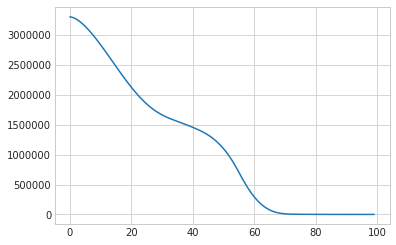

In [197]:
# summarize history for loss
axes = plt.gca()
plt.plot(history.history['loss'])

In [54]:
y_pred1 = estimator.predict(test)
y_pred1

200/200 [==============================] - 0s 114us/step


array([ 1805.42333984,  1822.09875488,  1895.35070801,  1903.52575684,
        1801.44299316,  1790.4675293 ,  1723.93225098,  1801.50012207,
        1723.6739502 ,  1796.55249023,  1795.78161621,  1867.08740234,
        1920.15441895,  1905.50146484,  1928.41711426,  1819.09863281,
        1773.01037598,  1771.93054199,  1864.62634277,  1783.90466309,
        1734.44018555,  1782.58679199,  1770.79614258,  1773.46643066,
        1821.01379395,  1773.04455566,  1867.37548828,  1804.74816895,
        1877.93518066,  1717.11096191,  1907.37756348,  1826.23156738,
        1769.70275879,  1766.10510254,  1768.09191895,  1819.6036377 ,
        1807.19909668,  1888.0098877 ,  1874.69177246,  1874.86291504,
        1771.59558105,  1785.15100098,  1884.6427002 ,  1797.24145508,
        1789.72814941,  1765.03259277,  1725.11999512,  1778.03625488,
        1780.83850098,  1790.07043457,  1915.32507324,  1889.98474121,
        1892.95153809,  1863.55114746,  1782.8182373 ,  1756.37023926,
      

In [200]:
df = pd.DataFrame()
df['header'] = y_pred1
df.to_csv('SubmissionFile.csv' , index = False , header = None)

# End Of Notebook